# Austin ANIMAL OUTCOMES 
by Ebru Yaren Çatak

---



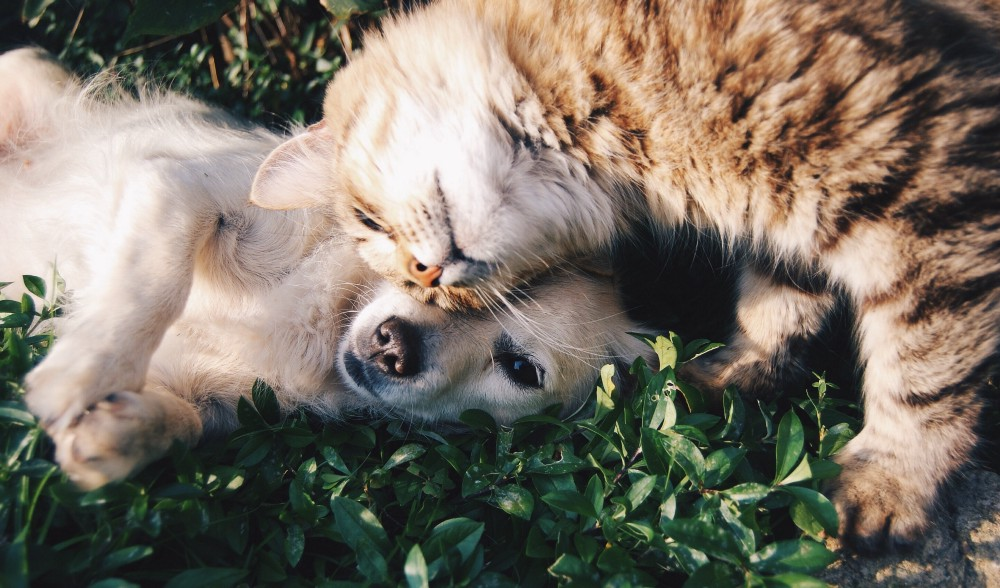

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch

import numpy as np # linear algebra
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import scikitplot as skplt

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## Train

In [ ]:
train_at = pd.read_csv("/content/drive/MyDrive/dataset/finish_merge_outer.csv")
train_at.columns = map(str.lower, train_at.columns)
train_at.rename(columns={'sex_upon_outcome':'sex'},inplace=True)
train_at.rename(columns={'outcome_type':'outcometype'},inplace=True)
train_at.rename(columns={'time_in_shelter_days':'duration'},inplace=True)
train_at.rename(columns={'intake_condition':'Health'},inplace=True)
train_at.rename(columns={'animal_type':'animaltype'},inplace=True)
train_at.rename(columns={'age_upon_outcome_(years)':'ageuponoutcome'},inplace=True)
train_at["outcometype"] = train_at["outcometype"].str.replace(" ", "_")
train_at["outcometype"].unique()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


array(['Return_to_Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan, 'Relocate'], dtype=object)

In [ ]:
condition = (train_at.outcometype == 'Adoption') | (train_at.outcometype == 'Transfer') | (train_at.outcometype == 'Return_to_Owner') |(train_at.outcometype == 'Euthanasia') |(train_at.outcometype == 'Died')
train_at = train_at[condition] # 필터링 된 row의 특정 컬럼만 추출

In [ ]:
train_at.outcometype.value_counts()

Adoption           24525
Transfer           16337
Return_to_Owner    16079
Euthanasia          4416
Died                 387
Name: outcometype, dtype: int64

In [ ]:
train_at = train_at.drop_duplicates(subset='intake_datetime')

In [ ]:
train_at.columns

Index(['animal_id', 'outcome_subtype', 'outcometype', 'sex', 'ageuponoutcome',
       'outcome_month', 'age_upon_outcome_(days)', 'animaltype', 'breed',
       'color', 'Health', 'intake_type', 'intake_datetime', 'intake_number',
       'duration', 'name'],
      dtype='object')

In [ ]:
train_at.columns

Index(['animal_id', 'outcome_subtype', 'outcometype', 'sex', 'ageuponoutcome',
       'outcome_month', 'age_upon_outcome_(days)', 'animaltype', 'breed',
       'color', 'Health', 'intake_type', 'intake_datetime', 'intake_number',
       'duration', 'name'],
      dtype='object')

In [ ]:
train_at.name.unique().size

8418

In [ ]:
train_at.outcometype.value_counts

<bound method IndexOpsMixin.value_counts of 0        Return_to_Owner
3        Return_to_Owner
6        Return_to_Owner
9               Transfer
10       Return_to_Owner
              ...       
62034           Transfer
62036           Adoption
62037         Euthanasia
62038           Transfer
62039           Transfer
Name: outcometype, Length: 34491, dtype: object>

In [ ]:
# train_at.apply(lambda x: sum(x.isnull()/len(train_at)))

# Petfinder

In [ ]:
# import two datasets
breed = pd.read_csv('/content/drive/MyDrive/pet/breed_labels.csv')
color = pd.read_csv('/content/drive/MyDrive/pet/color_labels.csv')
train_pf = pd.read_csv('/content/drive/MyDrive/pet/train.csv')
train_pf['DataType'] = 'train'

# the combine dataset for visualization purpose
train_pf.rename(columns={'AdoptionSpeed':'Speed'},inplace=True)

###Color

In [ ]:
# Change the Color to Strings based on color_labels

# train:
train_pf[['Color1','Color2','Color3']] = train_pf[['Color1','Color2','Color3']].replace([1,2,3,4,5,6,7],
                            ['Black','Brown','Golden','Yellow','Cream','Gray','White'])
train_pf[['Color1','Color2','Color3']] = train_pf[['Color1','Color2','Color3']].replace(0,'none')

## Breed

In [ ]:
# Change the top 5 dog/cat breeds to names

# train:
train_pf[['Breed1','Breed2']] = train_pf[['Breed1','Breed2']].replace([307,179,205,109,20,285,141,218,254,103,243,213,189,283,247,195,152,128,78,306,303,69,76,119],
                                                         ['Mixed breeds','Poodle','Shih Tzu',
                                                          'Golden Retriever','Beagle',
                                                          'Persian','Labrador Retriever',
                                                          'Terrier','Calico','German Shepherd Dog',
                                                          'American Shorthair','Spitz','Rottweiler',
                                                          'Oriental Short Hair','Bengal',
                                                          'Schnauzer','Miniature Pinscher',
                                                          'Jack Russell Terrier','Doberman Pinscher',
                                                          'Tuxedo','Tortoiseshell','Cocker Spaniel',
                                                          'Dalmatian','Husky'])


train_pf[['Breed1','Breed2']] = train_pf[['Breed1','Breed2']].replace([266,265,264,299,292],
                                                         ['Domestic short hair','Domestic medium hair',
                                                          'Domestic long hair','Tabby','Siamese'])

## rename/make new columns

In [ ]:
train_pf.rename(columns ={'Breed1':'breed',
                         'Type'  :'animaltype'},inplace=True)


train_pf['outcometype']='Adoption'

train_pf['AdoptionSpeed'] = 'duration'

In [ ]:
train_at.columns

Index(['animal_id', 'outcome_subtype', 'outcometype', 'sex', 'ageuponoutcome',
       'outcome_month', 'age_upon_outcome_(days)', 'animaltype', 'breed',
       'color', 'Health', 'intake_type', 'intake_datetime', 'intake_number',
       'duration', 'name'],
      dtype='object')

In [ ]:
train_pf.columns

Index(['animaltype', 'Name', 'Age', 'breed', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'Speed',
       'DataType', 'outcometype', 'AdoptionSpeed'],
      dtype='object')

In [ ]:
train_at.columns

Index(['animal_id', 'outcome_subtype', 'outcometype', 'sex', 'ageuponoutcome',
       'outcome_month', 'age_upon_outcome_(days)', 'animaltype', 'breed',
       'color', 'Health', 'intake_type', 'intake_datetime', 'intake_number',
       'duration', 'name'],
      dtype='object')

In [ ]:
# Change the Maturity Size as the following: 
#1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Sure

# train_pf:
train_pf[['MaturitySize']] = train_pf[['MaturitySize']].replace([0,1,2,3,4],
                            ['Not Sure','Small','Medium','Large','Extra Large'])


In [ ]:
# Change the Fur Length as the following: 
# 1 = Short, 2 = Medium, 3 = Long, 0 = Not Sure

# train_pf:
train_pf[['FurLength']] = train_pf[['FurLength']].replace([0,1,2,3],['Not Sure','Short','Medium','Long'])



In [ ]:
# Change the vacinated, Dewormed, Sterilized as the following:
#vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
#Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
#Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

# train_pf:
train_pf[['Vaccinated']] = train_pf[['Vaccinated']].replace([1,2,3],['Yes','No','Not Sure'])
train_pf[['Dewormed']] = train_pf[['Dewormed']].replace([1,2,3],['Yes','No','Not Sure'])
train_pf[['Sterilized']] = train_pf[['Sterilized']].replace([1,2,3],['Yes','No','Not Sure'])

In [ ]:
# Change the health as the following:
#1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Sure

# train_pf:
train_pf[['Health']] = train_pf[['Health']].replace([0,1,2,3],['Not Sure','Healthy','Minor Injury','Serious Injury'])

In [ ]:
# Change the DataType: 1 = Dog, 2 = Cat

# train_pf:
train_pf[['animaltype']] = train_pf[['animaltype']].replace([1,2],['Dog','Cat'])


In [ ]:
train_pf.head()

,animaltype,Name,Age,breed,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,Speed,DataType,outcometype,AdoptionSpeed
0,Cat,Nibble,3,Tabby,0,1,Black,White,none,Small,...,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,train,Adoption,duration
1,Cat,No Name Yet,1,Domestic medium hair,0,1,Black,Brown,none,Medium,...,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,train,Adoption,duration
2,Dog,Brisco,1,Mixed breeds,0,1,Brown,White,none,Medium,...,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,train,Adoption,duration
3,Dog,Miko,4,Mixed breeds,0,2,Black,Brown,none,Medium,...,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,train,Adoption,duration
4,Dog,Hunter,1,Mixed breeds,0,1,Black,none,none,Medium,...,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,train,Adoption,duration


In [ ]:
# Change the Gender: 1 = Male, 2 = Female, 3 = Neutered/Sprayed

# train_pf:
train_pf[['sex']] = train_pf[['Gender']].replace([1,2,3],['Male','Female','Neutered/Spayed'])


In [ ]:
# clean name column: 
# no name yet -> No name;
# Nan -> No name;
# No Name -> No name;

# train_pf:
train_pf['Name'] = train_pf['Name'].replace(['No Name Yet', '0'],['No name','0']) #No Name에 관해서도 처리 필요하다.
train_pf['Name'] = train_pf['Name'].fillna('0')


In [ ]:
train_pf['Name'].value_counts()

0                         1257
Baby                        66
Lucky                       64
No Name                     54
Brownie                     54
                          ... 
Fuzzy                        1
Maroo                        1
4 PUPPIES FOR ADOPTION       1
Trish                        1
Fili                         1
Name: Name, Length: 9061, dtype: int64

In [ ]:
# Drop unuseful columns and drop the AdoptionSpeed = null rows

#train_pf: 
train_pf_null = np.array(train_pf[train_pf['AdoptionSpeed'].isnull() == True].index)
train_pf = train_pf.drop(train_pf_null)
train_pf = train_pf.drop(['PhotoAmt','RescuerID','State','VideoAmt'], axis = 1)

In [ ]:
# save cleaned dataset as csv files:

#train_pf:
train_pf.to_csv('cleaned-train_pf.csv')

In [ ]:
train_pf.head(5)

,animaltype,Name,Age,breed,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,Description,PetID,Speed,DataType,outcometype,AdoptionSpeed,sex
0,Cat,Nibble,3,Tabby,0,1,Black,White,none,Small,...,Healthy,1,100,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,2,train,Adoption,duration,Male
1,Cat,No name,1,Domestic medium hair,0,1,Black,Brown,none,Medium,...,Healthy,1,0,I just found it alone yesterday near my apartm...,6296e909a,0,train,Adoption,duration,Male
2,Dog,Brisco,1,Mixed breeds,0,1,Brown,White,none,Medium,...,Healthy,1,0,Their pregnant mother was dumped by her irresp...,3422e4906,3,train,Adoption,duration,Male
3,Dog,Miko,4,Mixed breeds,0,2,Black,Brown,none,Medium,...,Healthy,1,150,"Good guard dog, very alert, active, obedience ...",5842f1ff5,2,train,Adoption,duration,Female
4,Dog,Hunter,1,Mixed breeds,0,1,Black,none,none,Medium,...,Healthy,1,0,This handsome yet cute boy is up for adoption....,850a43f90,2,train,Adoption,duration,Male


In [ ]:
train_pf.describe()

,Age,Gender,Quantity,Fee,Speed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.776162,1.576069,21.259988,2.516441
std,18.155790,0.681592,1.472477,78.414548,1.177265
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,2.000000
50%,3.000000,2.000000,1.000000,0.000000,2.000000
75%,12.000000,2.000000,1.000000,0.000000,4.000000
max,255.000000,3.000000,20.000000,3000.000000,4.000000


In [ ]:
train_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animaltype     14993 non-null  object
 1   Name           14993 non-null  object
 2   Age            14993 non-null  int64 
 3   breed          14993 non-null  object
 4   Breed2         14993 non-null  object
 5   Gender         14993 non-null  int64 
 6   Color1         14993 non-null  object
 7   Color2         14993 non-null  object
 8   Color3         14993 non-null  object
 9   MaturitySize   14993 non-null  object
 10  FurLength      14993 non-null  object
 11  Vaccinated     14993 non-null  object
 12  Dewormed       14993 non-null  object
 13  Sterilized     14993 non-null  object
 14  Health         14993 non-null  object
 15  Quantity       14993 non-null  int64 
 16  Fee            14993 non-null  int64 
 17  Description    14981 non-null  object
 18  PetID          14993 non-n

In [ ]:
def hasName(dataFrame):
  dataFrame["Name"] = dataFrame["Name"].fillna(0)
  dataFrame['hasName'] = dataFrame.Name.apply(lambda x: 0 if x == 0 else 1)
  return dataFrame

In [ ]:
train_pf= hasName(train_pf)


In [ ]:
train_pf

,animaltype,Name,Age,breed,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,Description,PetID,Speed,DataType,outcometype,AdoptionSpeed,sex,hasName
0,Cat,Nibble,3,Tabby,0,1,Black,White,none,Small,...,1,100,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,2,train,Adoption,duration,Male,1
1,Cat,No name,1,Domestic medium hair,0,1,Black,Brown,none,Medium,...,1,0,I just found it alone yesterday near my apartm...,6296e909a,0,train,Adoption,duration,Male,1
2,Dog,Brisco,1,Mixed breeds,0,1,Brown,White,none,Medium,...,1,0,Their pregnant mother was dumped by her irresp...,3422e4906,3,train,Adoption,duration,Male,1
3,Dog,Miko,4,Mixed breeds,0,2,Black,Brown,none,Medium,...,1,150,"Good guard dog, very alert, active, obedience ...",5842f1ff5,2,train,Adoption,duration,Female,1
4,Dog,Hunter,1,Mixed breeds,0,1,Black,none,none,Medium,...,1,0,This handsome yet cute boy is up for adoption....,850a43f90,2,train,Adoption,duration,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,Cat,0,2,Domestic short hair,0,3,Black,none,none,Medium,...,4,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,2,train,Adoption,duration,Neutered/Spayed,1
14989,Cat,Serato & Eddie,60,Domestic medium hair,Domestic long hair,3,Black,Yellow,White,Medium,...,2,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,4,train,Adoption,duration,Neutered/Spayed,1
14990,Cat,Monkies,2,Domestic medium hair,Domestic short hair,3,Cream,Gray,White,Large,...,5,30,"Mix breed, good temperament kittens. Love huma...",d981b6395,3,train,Adoption,duration,Neutered/Spayed,1
14991,Cat,Ms Daym,9,Domestic short hair,0,2,Yellow,White,none,Small,...,1,0,she is very shy..adventures and independent..s...,e4da1c9e4,4,train,Adoption,duration,Female,1


In [ ]:
train_pf = train_pf.drop(["Name"],axis=1)


In [ ]:
def calc_age_in_days(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x == '0': return 0
    else: return age * 30

In [ ]:
train_pf['AgeInDays'] = train_pf.Age.apply(calc_age_in_days)


In [ ]:
train_pf['AgeInMonths']=train_pf.Age


In [ ]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    return (int(x)//int(12))

train_pf['AgeInYears'] = train_pf.Age.apply(calc_age_in_years)

In [ ]:
train_pf['AgeInYears'].value_counts() # 나이대 분포

0     11244
1      1557
2       817
3       484
4       300
5       223
6       125
7       112
8        48
10       35
9        24
11        9
12        5
17        3
21        2
15        2
13        1
14        1
19        1
Name: AgeInYears, dtype: int64

In [ ]:
train_pf.drop

<bound method DataFrame.drop of       animaltype  Age                 breed               Breed2  Gender  \
0            Cat    3                 Tabby                    0       1   
1            Cat    1  Domestic medium hair                    0       1   
2            Dog    1          Mixed breeds                    0       1   
3            Dog    4          Mixed breeds                    0       2   
4            Dog    1          Mixed breeds                    0       1   
...          ...  ...                   ...                  ...     ...   
14988        Cat    2   Domestic short hair                    0       3   
14989        Cat   60  Domestic medium hair   Domestic long hair       3   
14990        Cat    2  Domestic medium hair  Domestic short hair       3   
14991        Cat    9   Domestic short hair                    0       2   
14992        Dog    1          Mixed breeds         Mixed breeds       1   

       Color1  Color2 Color3 MaturitySize FurLength  ..

#ISpuppy(petfinder)

In [ ]:
def setPuppy(dataFrame):
  dataFrame["isPuppy"] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] >= 56] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] < 56 ] = 1 #puppies
  return dataFrame

In [ ]:
train_pf = setPuppy(train_pf)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_pf = train_pf.drop(['Age'],axis=1)


## EDA adapt -> Young & NotVaccinated & Dewormed

In [ ]:
train_pf.columns

Index(['animaltype', 'breed', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'Description', 'PetID', 'Speed',
       'DataType', 'outcometype', 'AdoptionSpeed', 'sex', 'hasName',
       'AgeInDays', 'AgeInMonths', 'AgeInYears', 'isPuppy'],
      dtype='object')

In [ ]:
train_pf.Vaccinated

0              No
1        Not Sure
2             Yes
3             Yes
4              No
           ...   
14988          No
14989         Yes
14990          No
14991         Yes
14992          No
Name: Vaccinated, Length: 14993, dtype: object

In [ ]:
train_pf.Dewormed

0              No
1        Not Sure
2             Yes
3             Yes
4              No
           ...   
14988          No
14989         Yes
14990         Yes
14991         Yes
14992          No
Name: Dewormed, Length: 14993, dtype: object

In [ ]:
def YVD(dataFrame):
  dataFrame["novaccine_dewormed"] = 0
  dataFrame["novaccine_dewormed"][(dataFrame['Vaccinated']=='No') &(dataFrame['Dewormed']=='Yes')] = 1

  return dataFrame

In [ ]:
train_pf = YVD(train_pf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train_pf.novaccine_dewormed.value_counts()

0    12506
1     2487
Name: novaccine_dewormed, dtype: int64

In [ ]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=23)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=60) # figure title 폰트 크기

In [ ]:
# plt.figure(figsize=(10,8))
# sns.countplot(train_pf.Puppy_novaccine_dewormed,palette='Pastel2_r')
# plt.savefig("High resoltion.png",dpi=320)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


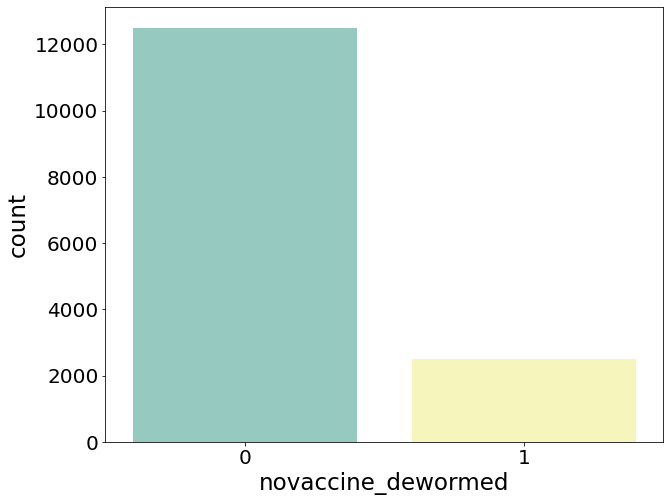

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(train_pf.novaccine_dewormed,palette='Set3')

In [ ]:
def isNeutered(dataFrame):
    dataFrame['Sterilized'] = pd.np.where(dataFrame.sex.str.contains("Neutered"), 1, 
                                          pd.np.where(dataFrame.sex.str.contains("Spayed"), 1, 0))
    return dataFrame

In [ ]:
train_pf = isNeutered(train_pf)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


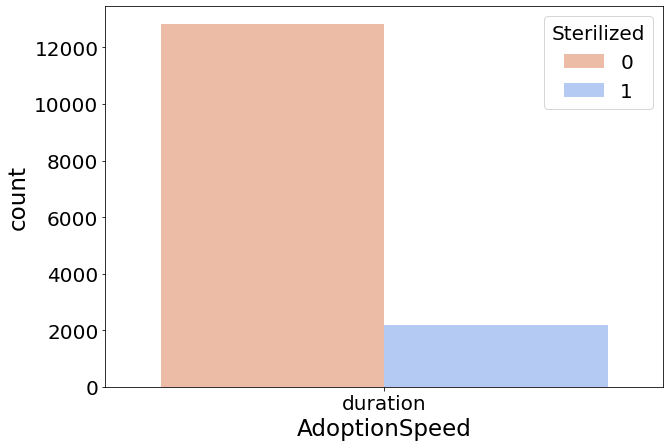

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train_pf, x='AdoptionSpeed',hue='Sterilized', palette='coolwarm_r')

In [ ]:
def setSex(dataFrame):
    dataFrame['sex'] = pd.np.where(dataFrame.sex.str.contains("Female"), "Female",
                       pd.np.where(dataFrame.sex.str.contains("Male"), "Male", "None"))
    return dataFrame

In [ ]:
train_pf = setSex(train_pf)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train_pf = train_pf.drop(["Gender"],axis=1)


In [ ]:
train_pf = train_pf.drop(['AdoptionSpeed'],axis=1)

In [ ]:
train_pf.columns

Index(['animaltype', 'breed', 'Breed2', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'Description', 'PetID', 'Speed',
       'DataType', 'outcometype', 'sex', 'hasName', 'AgeInDays', 'AgeInMonths',
       'AgeInYears', 'isPuppy', 'novaccine_dewormed'],
      dtype='object')

In [ ]:
train_pf.to_csv(path_or_buf='/content/drive/MyDrive/dataset/re_origin_pf_dataset')



In [ ]:
train_pf = train_pf.drop(["PetID","Description","DataType","Quantity"],axis=1)


In [ ]:
train_pf.head()

,animaltype,breed,Breed2,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,...,Fee,Speed,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy,novaccine_dewormed
0,Cat,Tabby,0,Black,White,none,Small,Short,No,No,...,100,2,Adoption,Male,1,90,3,0,0,0
1,Cat,Domestic medium hair,0,Black,Brown,none,Medium,Medium,Not Sure,Not Sure,...,0,0,Adoption,Male,1,30,1,0,1,0
2,Dog,Mixed breeds,0,Brown,White,none,Medium,Medium,Yes,Yes,...,0,3,Adoption,Male,1,30,1,0,1,0
3,Dog,Mixed breeds,0,Black,Brown,none,Medium,Short,Yes,Yes,...,150,2,Adoption,Female,1,120,4,0,0,0
4,Dog,Mixed breeds,0,Black,none,none,Medium,Short,No,No,...,0,2,Adoption,Male,1,30,1,0,1,0


In [ ]:
train_pf.head()

,animaltype,breed,Breed2,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,...,Fee,Speed,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy,novaccine_dewormed
0,Cat,Tabby,0,Black,White,none,Small,Short,No,No,...,100,2,Adoption,Male,1,90,3,0,0,0
1,Cat,Domestic medium hair,0,Black,Brown,none,Medium,Medium,Not Sure,Not Sure,...,0,0,Adoption,Male,1,30,1,0,1,0
2,Dog,Mixed breeds,0,Brown,White,none,Medium,Medium,Yes,Yes,...,0,3,Adoption,Male,1,30,1,0,1,0
3,Dog,Mixed breeds,0,Black,Brown,none,Medium,Short,Yes,Yes,...,150,2,Adoption,Female,1,120,4,0,0,0
4,Dog,Mixed breeds,0,Black,none,none,Medium,Short,No,No,...,0,2,Adoption,Male,1,30,1,0,1,0


In [ ]:
color_counts = train_pf['Color1'].value_counts()
color_counts.head(20)

Black     7427
Brown     3750
Golden     947
Cream      884
Gray       684
White      667
Yellow     634
Name: Color1, dtype: int64

In [ ]:
color_counts = train_pf['Color2'].value_counts()
color_counts.head(20)

none      4471
White     3438
Brown     3313
Cream     1128
Gray      1063
Yellow     870
Golden     710
Name: Color2, dtype: int64

In [ ]:
color_counts = train_pf['Color3'].value_counts()
color_counts.head(20)

none      10604
White      3221
Cream       417
Gray        378
Yellow      198
Golden      175
Name: Color3, dtype: int64

In [ ]:
train_pf['color']=train_pf['Color1']+str('/')+train_pf['Color2']


In [ ]:
train_pf['color']

0         Black/White
1         Black/Brown
2         Brown/White
3         Black/Brown
4          Black/none
             ...     
14988      Black/none
14989    Black/Yellow
14990      Cream/Gray
14991    Yellow/White
14992      Brown/none
Name: color, Length: 14993, dtype: object

In [ ]:
train_pf['isMultiColor'] = train_pf['color'].apply(lambda x:0 if 'none' in x else 1)
train_pf['color'] = train_pf['color'].str.rstrip('/none')


In [ ]:
train_pf.isMultiColor.value_counts()

1    10522
0     4471
Name: isMultiColor, dtype: int64

In [ ]:
train_pf = train_pf.drop(["Color1","Color2","Color3"],axis=1)

#Austin

In [ ]:
train_at.columns

Index(['animal_id', 'outcome_subtype', 'outcometype', 'sex', 'ageuponoutcome',
       'outcome_month', 'age_upon_outcome_(days)', 'animaltype', 'breed',
       'color', 'Health', 'intake_type', 'intake_datetime', 'intake_number',
       'duration', 'name'],
      dtype='object')

In [ ]:
train_at = train_at.drop(['animal_id','outcome_subtype','intake_datetime'], axis=1)

In [ ]:
np.sum(train_at.isnull())

outcometype                   0
sex                           1
ageuponoutcome                0
outcome_month                 0
age_upon_outcome_(days)       0
animaltype                    0
breed                         0
color                         0
Health                        0
intake_type                   0
intake_number                 0
duration                      0
name                       8420
dtype: int64

In [ ]:
# train_at.dropna(subset=['sex'], inplace=True)

In [ ]:
# train_at = train_at.drop(['outcomesubtype'], axis=1)
# train_at = train_at.drop(['datetime'], axis=1)

In [ ]:
train_at.columns

Index(['outcometype', 'sex', 'ageuponoutcome', 'outcome_month',
       'age_upon_outcome_(days)', 'animaltype', 'breed', 'color', 'Health',
       'intake_type', 'intake_number', 'duration', 'name'],
      dtype='object')

### NAME

In [ ]:
def hasName(dataFrame):
  dataFrame["name"] = dataFrame["name"].fillna(0)
  dataFrame['hasName'] = dataFrame.name.apply(lambda x: 0 if x == 0 else 1)
  return dataFrame

In [ ]:
train_at = hasName(train_at)
train_at = train_at.drop(['name'], axis=1)


In [ ]:
np.sum(train_at.isnull())

outcometype                0
sex                        1
ageuponoutcome             0
outcome_month              0
age_upon_outcome_(days)    0
animaltype                 0
breed                      0
color                      0
Health                     0
intake_type                0
intake_number              0
duration                   0
hasName                    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


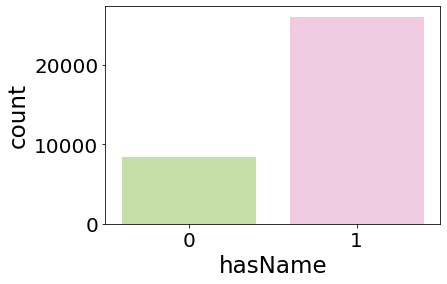

In [ ]:
sns.countplot(train_at.hasName, palette='PiYG_r')

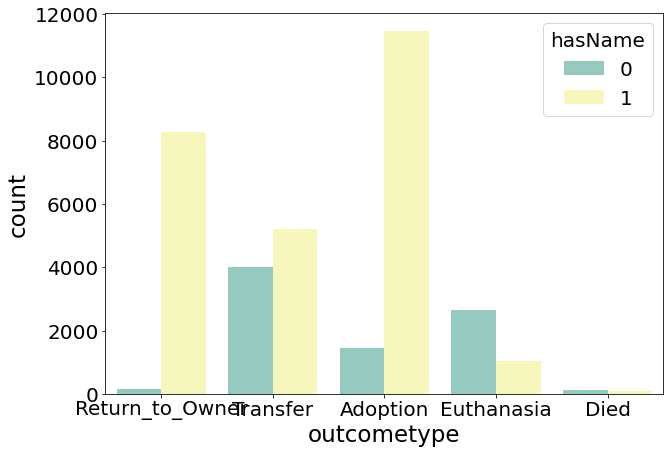

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train_at, x='outcometype',hue='hasName', palette='Set3')

### AGE

### Age in Days

In [ ]:
# rename : age_upon_outcome_(days) , AgeInDays
# rename : age_upon_outcome_(years), AgeInYears
# rename : outcome_month -> AgeInMonths
train_at.rename(columns ={'age_upon_outcome_(days)':'AgeInDays',
                         'outcome_month'  :'AgeInMonths',
                         'age_upon_outcome_(years)'  :'AgeInYears'}, inplace=True)

In [ ]:
train_at.columns

Index(['outcometype', 'sex', 'ageuponoutcome', 'AgeInMonths', 'AgeInDays',
       'animaltype', 'breed', 'color', 'Health', 'intake_type',
       'intake_number', 'duration', 'hasName'],
      dtype='object')

In [ ]:
train_pf.AgeInMonths

0         3
1         1
2         1
3         4
4         1
         ..
14988     2
14989    60
14990     2
14991     9
14992     1
Name: AgeInMonths, Length: 14993, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


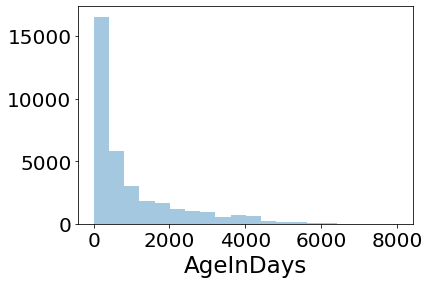

In [ ]:
sns.distplot(train_at.AgeInDays, bins = 20, kde=False)

### Is a Puppy?(Austin animal)


In [ ]:
def setPuppy(dataFrame):
  dataFrame["isPuppy"] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] >= 56] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] < 56 ] = 1 #puppies
  return dataFrame

In [ ]:
train_at = setPuppy(train_at)
train_at = setPuppy(train_at)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


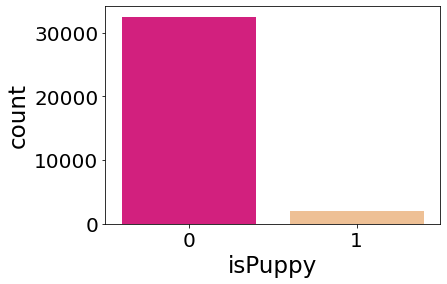

In [ ]:
sns.countplot(train_at.isPuppy, palette='Accent_r')

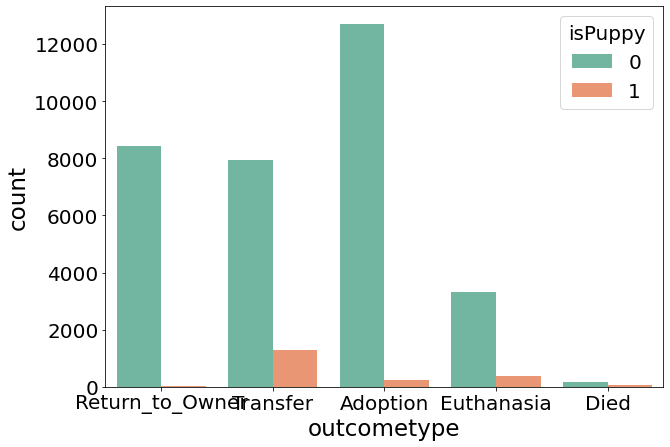

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train_at, x='outcometype',hue='isPuppy', palette='Set2')

In [ ]:
train_at = train_at.drop(['ageuponoutcome'],axis=1)
train_at = train_at.reset_index(drop=True)

### GENDER

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


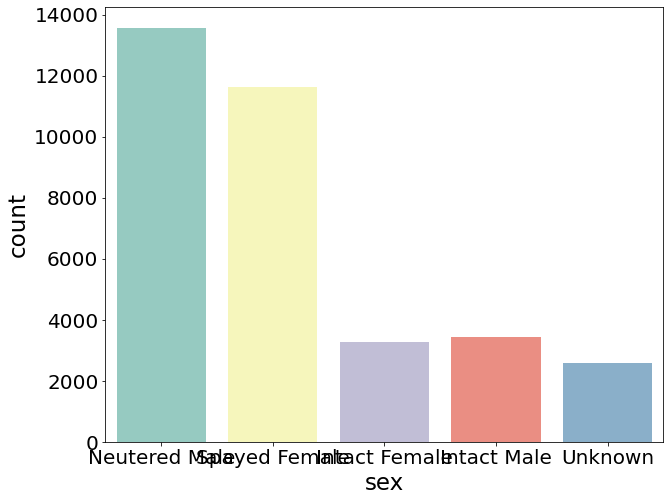

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(train_at.sex, palette='Set3')

## Is neureted?

In [ ]:
def isNeutered(dataFrame):
    dataFrame['Sterilized'] = pd.np.where(dataFrame.sex.str.contains("Neutered"), 1, 
                                          pd.np.where(dataFrame.sex.str.contains("Spayed"), 1, 0))
    dataFrame['sex'] = pd.np.where(dataFrame.sex.str.contains("Neutered"),"None",
                                   pd.np.where(dataFrame.sex.str.contains("Spayed"),"None",dataFrame['sex']))
    return dataFrame

In [ ]:
train_at = isNeutered(train_at)
train_at = setSex(train_at)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


In [ ]:
train_at.head(20)

,outcometype,sex,AgeInMonths,AgeInDays,animaltype,breed,color,Health,intake_type,intake_number,duration,hasName,isPuppy,Sterilized
0,Return_to_Owner,None,12,3650,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,1,d,1,0,1
1,Return_to_Owner,None,12,2555,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,2,1.259722222,1,0,1
2,Return_to_Owner,None,3,2190,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,3,1.113888889,1,0,1
3,Transfer,None,4,3650,Dog,Dachshund,Tricolor,Normal,Owner Surrender,1,4.970138889,1,0,1
4,Return_to_Owner,None,11,5840,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,1,0.119444444,1,0,1
5,Return_to_Owner,None,11,5475,Dog,Labrador Retriever/Pit Bull,Black/White,Aged,Stray,1,0.870833333,1,0,1
6,Return_to_Owner,Female,11,5475,Dog,Miniature Schnauzer Mix,Black/Gray,Normal,Stray,1,0.178472222,1,0,0
7,Return_to_Owner,None,9,5475,Dog,Lhasa Apso Mix,Brown/White,Normal,Stray,1,0.213194444,1,0,1
8,Return_to_Owner,None,3,5475,Dog,Shetland Sheepdog Mix,White/Black,Normal,Public Assist,1,6.258333333,1,0,1
9,Return_to_Owner,None,9,6570,Dog,Shetland Sheepdog Mix,Brown/White,Normal,Stray,1,0.054166667,1,0,1


In [ ]:
train_pf.head()

,animaltype,breed,Breed2,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,...,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy,novaccine_dewormed,color,isMultiColor
0,Cat,Tabby,0,Small,Short,No,No,0,Healthy,100,...,Adoption,Male,1,90,3,0,0,0,Black/Whit,1
1,Cat,Domestic medium hair,0,Medium,Medium,Not Sure,Not Sure,0,Healthy,0,...,Adoption,Male,1,30,1,0,1,0,Black/Brow,1
2,Dog,Mixed breeds,0,Medium,Medium,Yes,Yes,0,Healthy,0,...,Adoption,Male,1,30,1,0,1,0,Brown/Whit,1
3,Dog,Mixed breeds,0,Medium,Short,Yes,Yes,0,Healthy,150,...,Adoption,Female,1,120,4,0,0,0,Black/Brow,1
4,Dog,Mixed breeds,0,Medium,Short,No,No,0,Healthy,0,...,Adoption,Male,1,30,1,0,1,0,Black,0


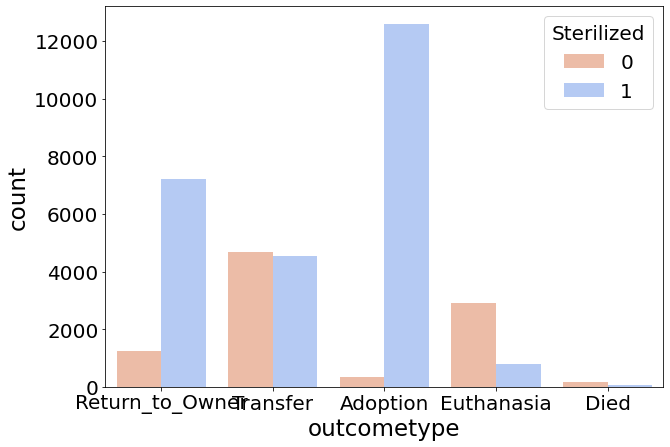

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train_at, x='outcometype',hue='Sterilized', palette='coolwarm_r')

In [ ]:
def setSex(dataFrame):
    dataFrame['sex'] = pd.np.where(dataFrame.sex.str.contains("Female"), "Female",
                       pd.np.where(dataFrame.sex.str.contains("Male"), "Male", "None"))
    return dataFrame

In [ ]:
train_at = setSex(train_at)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train_at.head()

,outcometype,sex,AgeInMonths,AgeInDays,animaltype,breed,color,Health,intake_type,intake_number,duration,hasName,isPuppy,Sterilized
0,Return_to_Owner,None,12,3650,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,1,d,1,0,1
1,Return_to_Owner,None,12,2555,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,2,1.259722222,1,0,1
2,Return_to_Owner,None,3,2190,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,3,1.113888889,1,0,1
3,Transfer,None,4,3650,Dog,Dachshund,Tricolor,Normal,Owner Surrender,1,4.970138889,1,0,1
4,Return_to_Owner,None,11,5840,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,1,0.119444444,1,0,1


In [ ]:
train_pf.head(30)

,animaltype,breed,Breed2,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,...,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy,novaccine_dewormed,color,isMultiColor
0,Cat,Tabby,0,Small,Short,No,No,0,Healthy,100,...,Adoption,Male,1,90,3,0,0,0,Black/Whit,1
1,Cat,Domestic medium hair,0,Medium,Medium,Not Sure,Not Sure,0,Healthy,0,...,Adoption,Male,1,30,1,0,1,0,Black/Brow,1
2,Dog,Mixed breeds,0,Medium,Medium,Yes,Yes,0,Healthy,0,...,Adoption,Male,1,30,1,0,1,0,Brown/Whit,1
3,Dog,Mixed breeds,0,Medium,Short,Yes,Yes,0,Healthy,150,...,Adoption,Female,1,120,4,0,0,0,Black/Brow,1
4,Dog,Mixed breeds,0,Medium,Short,No,No,0,Healthy,0,...,Adoption,Male,1,30,1,0,1,0,Black,0
5,Cat,Domestic short hair,0,Medium,Short,No,No,0,Healthy,0,...,Adoption,Female,1,90,3,0,0,0,Cream/Gray,1
6,Cat,Domestic long hair,Domestic long hair,Medium,Long,No,No,0,Healthy,300,...,Adoption,Male,1,360,12,1,0,0,Black,0
7,Dog,Mixed breeds,0,Medium,Short,No,No,0,Healthy,0,...,Adoption,Female,1,0,0,0,1,0,Black/Brow,1
8,Cat,Domestic medium hair,0,Medium,Medium,No,No,0,Healthy,0,...,Adoption,Female,1,60,2,0,0,0,Gray,0
9,Cat,Domestic medium hair,0,Medium,Medium,Not Sure,Not Sure,0,Healthy,0,...,Adoption,Female,1,360,12,1,0,0,Black/Whit,1


### COLOR

In [ ]:
color_counts = train_at['color'].value_counts()
color_counts.head(20)

Black/White            3600
Black                  2484
Brown                  1654
Brown Tabby            1367
Brown/White            1345
White                  1313
Tan/White              1189
Tricolor               1051
Black/Tan               991
Blue/White              983
White/Black             946
Tan                     904
White/Brown             859
Brown Tabby/White       788
Brown Brindle/White     752
Orange Tabby            716
Black/Brown             708
Brown/Black             694
White/Tan               582
Red                     528
Name: color, dtype: int64

In [ ]:
train_at['isMultiColor'] = train_at['color'].apply(lambda x : 1 if '/' in x else 0)


In [ ]:
train_at

,outcometype,sex,AgeInMonths,AgeInDays,animaltype,breed,color,Health,intake_type,intake_number,duration,hasName,isPuppy,Sterilized,isMultiColor
0,Return_to_Owner,None,12,3650,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,1,d,1,0,1,1
1,Return_to_Owner,None,12,2555,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,2,1.259722222,1,0,1,1
2,Return_to_Owner,None,3,2190,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,3,1.113888889,1,0,1,1
3,Transfer,None,4,3650,Dog,Dachshund,Tricolor,Normal,Owner Surrender,1,4.970138889,1,0,1,0
4,Return_to_Owner,None,11,5840,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,1,0.119444444,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34486,Transfer,None,4,1095,Cat,Angora Mix,White,Normal,Stray,1,4.345139,1,0,1,0
34487,Adoption,None,4,730,Dog,Labrador Retriever Mix,Black/White,Normal,Stray,1,7.906944,1,0,1,1
34488,Euthanasia,None,4,365,Cat,Domestic Shorthair Mix,Orange Tabby/White,Normal,Stray,1,14.361111,1,0,1,1
34489,Transfer,None,4,365,Cat,Domestic Shorthair Mix,Orange Tabby/White,Normal,Stray,1,6.03125,0,0,1,1


### Sex

### Drop cleaning

Mix or Pure

In [ ]:
import re
train_at['breedType'] = train_at.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')
       

In [ ]:
train_at.breed.head(20)

0                   Spinone Italiano Mix
1                   Spinone Italiano Mix
2                   Spinone Italiano Mix
3                              Dachshund
4                      Shetland Sheepdog
5            Labrador Retriever/Pit Bull
6                Miniature Schnauzer Mix
7                         Lhasa Apso Mix
8                  Shetland Sheepdog Mix
9                  Shetland Sheepdog Mix
10                 Domestic Longhair Mix
11                American Shorthair Mix
12                         Dachshund Mix
13                     Border Collie Mix
14                   Chihuahua Shorthair
15    German Shepherd/Labrador Retriever
16                    Domestic Shorthair
17                      Newfoundland Mix
18                                   Pug
19                     Staffordshire Mix
Name: breed, dtype: object

In [ ]:
# train_at['breeddf['email_endswith']   = df['email'].str.endswith(pat='com')

In [ ]:
train_pf['breedType'] = train_pf.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')   


In [ ]:
train_pf.breedType.head(20)

0     pure
1     pure
2      mix
3      mix
4      mix
5     pure
6     pure
7      mix
8     pure
9     pure
10     mix
11    pure
12     mix
13    pure
14     mix
15    pure
16    pure
17     mix
18     mix
19    pure
Name: breedType, dtype: object

In [ ]:
train_pf.breedType.head(20)

0     pure
1     pure
2      mix
3      mix
4      mix
5     pure
6     pure
7      mix
8     pure
9     pure
10     mix
11    pure
12     mix
13    pure
14     mix
15    pure
16    pure
17     mix
18     mix
19    pure
Name: breedType, dtype: object

In [ ]:
train_pf.color.value_counts() #이거 다 멀티칼라 안되게끔 None을 제거해야겠넹.

Black/Brow       3313
Brow             1460
Black/Whit       1375
Black            1002
Brown/Whit        929
Whit              667
Black/Gray        632
Brown/Cream       597
Black/Yellow      494
Cream             483
Gray/Whit         377
Gold              369
Brown/Gold        359
Black/Gold        351
Gray              307
Cream/Whit        286
Yellow/Whit       269
Black/Cream       260
Brown/Yellow      223
Golden/Whit       202
Yellow            183
Brown/Gray        182
Golden/Cream      154
Golden/Yellow     153
Yellow/Cream      117
Cream/Gray        115
Golden/Gray        69
Yellow/Gray        65
Name: color, dtype: int64

In [ ]:
train_at.color.value_counts()

Black/White                  3600
Black                        2484
Brown                        1654
Brown Tabby                  1367
Brown/White                  1345
                             ... 
Chocolate/Brown Brindle         1
Cream/Orange                    1
Cream/Seal Point                1
Brown Tabby/Black Brindle       1
Lynx Point/Tortie Point         1
Name: color, Length: 402, dtype: int64

In [ ]:
train_pf['breedType'] = train_pf.breed.str.extract('({})'.format('|'.join(['Mix'])),  #역슬래쉬가 존재하면 Mix라고 함 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')

### BREED

### Top 50 Breeds

### Austin animal dataset's breed


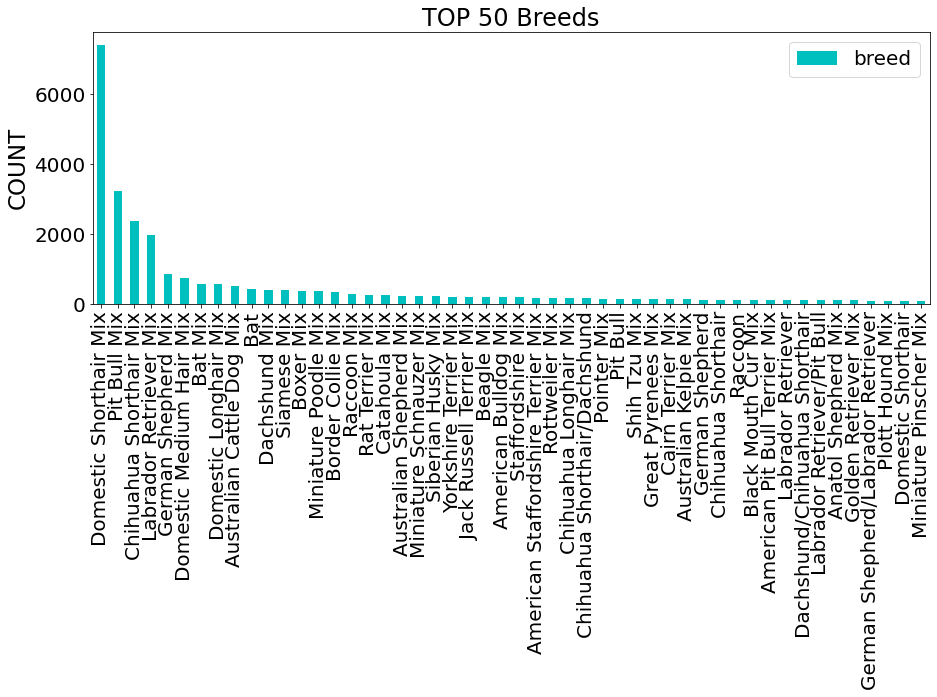

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.title('TOP 50 Breeds')
plt.ylabel('COUNT')
train_at['breed'].value_counts()[:50].plot(kind='bar', color='c')
plt.legend()
plt.show()

In [ ]:
train_at.columns

Index(['outcometype', 'sex', 'AgeInMonths', 'AgeInDays', 'animaltype', 'breed',
       'color', 'Health', 'intake_type', 'intake_number', 'duration',
       'hasName', 'isPuppy', 'Sterilized', 'isMultiColor', 'breedType'],
      dtype='object')

In [ ]:
n = 50
mostCommonBreeds = train_at['breed'].value_counts()[:n].index.tolist()
train_at['breedIs'] = 'other'

for i in mostCommonBreeds:
  train_at['breedIs'][train_at['breed'] == i] = i

# train_at = train_at.drop(['breed'], axis=1)

train_at = train_at.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Check dataset

In [ ]:
# n = 50
# mostCommonBreeds = train_pf['breed'].value_counts()[:n].index.tolist()
# train_pf['breedIs'] = 'other'

# for i in mostCommonBreeds:
#   train_pf['breedIs'][train_pf['breed'] == i] = i

# # train_pf = train_pf.drop(['breed'], axis=1)

# train_pf = train_pf.reset_index(drop=True)

In [ ]:
# train_pf['breed'].value_counts()

In [ ]:
train_pf.head()
train_pf = train_pf.drop(['Breed2'],axis=1)
train_pf = train_pf.reset_index(drop=True)

In [ ]:
train_pf.columns

Index(['animaltype', 'breed', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Fee', 'Speed', 'outcometype',
       'sex', 'hasName', 'AgeInDays', 'AgeInMonths', 'AgeInYears', 'isPuppy',
       'novaccine_dewormed', 'color', 'isMultiColor', 'breedType'],
      dtype='object')

In [ ]:
# train_at['outcometype'].value_counts()

In [ ]:
# train_at.head()

#### Make Location 

In [ ]:
train_pf['Location'] = 'Malaysia'
train_at['Location'] = 'Ausin'

merged dataset breeds

In [ ]:
train_at

,outcometype,sex,AgeInMonths,AgeInDays,animaltype,breed,color,Health,intake_type,intake_number,duration,hasName,isPuppy,Sterilized,isMultiColor,breedType,breedIs,Location
0,Return_to_Owner,None,12,3650,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,1,d,1,0,1,1,mix,other,Ausin
1,Return_to_Owner,None,12,2555,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,2,1.259722222,1,0,1,1,mix,other,Ausin
2,Return_to_Owner,None,3,2190,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,3,1.113888889,1,0,1,1,mix,other,Ausin
3,Transfer,None,4,3650,Dog,Dachshund,Tricolor,Normal,Owner Surrender,1,4.970138889,1,0,1,0,pure,other,Ausin
4,Return_to_Owner,None,11,5840,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,1,0.119444444,1,0,1,1,pure,other,Ausin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34486,Transfer,None,4,1095,Cat,Angora Mix,White,Normal,Stray,1,4.345139,1,0,1,0,mix,other,Ausin
34487,Adoption,None,4,730,Dog,Labrador Retriever Mix,Black/White,Normal,Stray,1,7.906944,1,0,1,1,mix,Labrador Retriever Mix,Ausin
34488,Euthanasia,None,4,365,Cat,Domestic Shorthair Mix,Orange Tabby/White,Normal,Stray,1,14.361111,1,0,1,1,mix,Domestic Shorthair Mix,Ausin
34489,Transfer,None,4,365,Cat,Domestic Shorthair Mix,Orange Tabby/White,Normal,Stray,1,6.03125,0,0,1,1,mix,Domestic Shorthair Mix,Ausin


In [ ]:
#어느 지역 출신인지 표시하는 플래그십을 만들었음

In [ ]:
train_pf.columns

Index(['animaltype', 'breed', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Fee', 'Speed', 'outcometype',
       'sex', 'hasName', 'AgeInDays', 'AgeInMonths', 'AgeInYears', 'isPuppy',
       'novaccine_dewormed', 'color', 'isMultiColor', 'breedType', 'Location'],
      dtype='object')

In [ ]:
# 0 - Pet was adopted on the same day as it was listed.
# 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
# 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
# 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
# 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

In [ ]:
train_at.duration.describe()

count           34491
unique          21322
top       0.013194444
freq               31
Name: duration, dtype: object

In [ ]:
def setPuppy(dataFrame):
  dataFrame["isPuppy"] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] >= 56] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] < 56 ] = 1 #puppies
  return dataFrame

In [ ]:
def make_duration(dataFrame):
  dataFrame['Speed'] = 0
  dataFrame['Speed'][dataFrame["duration"].astype('float')< 1.0] = 0
  dataFrame['Speed'][(dataFrame["duration"].astype('float')>= 1.0) & (dataFrame["duration"].astype('float')<7.0)] = 1
  dataFrame['Speed'][(dataFrame["duration"].astype('float')>= 7.0) & (dataFrame["duration"].astype('float')<30.0)] = 2
  dataFrame['Speed'][(dataFrame["duration"].astype('float')>= 30.0) & (dataFrame["duration"].astype('float')<90.0)] = 3
  dataFrame['Speed'][dataFrame["duration"].astype('float')>= 90.0] = 4    

  return dataFrame

In [ ]:
train_at.duration

0                  d
1        1.259722222
2        1.113888889
3        4.970138889
4        0.119444444
            ...     
34486       4.345139
34487       7.906944
34488      14.361111
34489        6.03125
34490      14.308333
Name: duration, Length: 34491, dtype: object

In [ ]:
train_at = train_at[1:]
train_at = train_at.reset_index(drop=True)

In [ ]:
train_at = make_duration(train_at)


train_at = train_at.drop('duration',axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
train_at

,outcometype,sex,AgeInMonths,AgeInDays,animaltype,breed,color,Health,intake_type,intake_number,hasName,isPuppy,Sterilized,isMultiColor,breedType,breedIs,Location,Speed
0,Return_to_Owner,None,12,2555,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,2,1,0,1,1,mix,other,Ausin,1
1,Return_to_Owner,None,3,2190,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,3,1,0,1,1,mix,other,Ausin,1
2,Transfer,None,4,3650,Dog,Dachshund,Tricolor,Normal,Owner Surrender,1,1,0,1,0,pure,other,Ausin,1
3,Return_to_Owner,None,11,5840,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,1,1,0,1,1,pure,other,Ausin,0
4,Return_to_Owner,None,11,5475,Dog,Labrador Retriever/Pit Bull,Black/White,Aged,Stray,1,1,0,1,1,pure,Labrador Retriever/Pit Bull,Ausin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34485,Transfer,None,4,1095,Cat,Angora Mix,White,Normal,Stray,1,1,0,1,0,mix,other,Ausin,1
34486,Adoption,None,4,730,Dog,Labrador Retriever Mix,Black/White,Normal,Stray,1,1,0,1,1,mix,Labrador Retriever Mix,Ausin,2
34487,Euthanasia,None,4,365,Cat,Domestic Shorthair Mix,Orange Tabby/White,Normal,Stray,1,1,0,1,1,mix,Domestic Shorthair Mix,Ausin,2
34488,Transfer,None,4,365,Cat,Domestic Shorthair Mix,Orange Tabby/White,Normal,Stray,1,0,0,1,1,mix,Domestic Shorthair Mix,Ausin,1


In [ ]:
# train_at.columns
# train_at = train_at.drop('duration',axis=1)
# train_at = train_at.reset_index(drop=True)

In [ ]:
merge_train = pd.concat([train_at,train_pf],ignore_index=True)
merge_train = merge_train.reset_index(drop=True)

In [ ]:
merge_train.isnull().sum()

outcometype               0
sex                       0
AgeInMonths               0
AgeInDays                 0
animaltype                0
breed                     0
color                     0
Health                    0
intake_type           14993
intake_number         14993
hasName                   0
isPuppy                   0
Sterilized                0
isMultiColor              0
breedType                 0
breedIs               14993
Location                  0
Speed                     0
MaturitySize          34490
FurLength             34490
Vaccinated            34490
Dewormed              34490
Fee                   34490
AgeInYears            34490
novaccine_dewormed    34490
dtype: int64

In [ ]:
# merge_train.isnull().sum()

In [ ]:
# for column in merge_train.columns:
#     merge_train[column].fillna(merge_train[column].mode()[0], inplace=True)

# merge_train.isnull().sum()

In [ ]:
merge_train.head()

,outcometype,sex,AgeInMonths,AgeInDays,animaltype,breed,color,Health,intake_type,intake_number,...,breedIs,Location,Speed,MaturitySize,FurLength,Vaccinated,Dewormed,Fee,AgeInYears,novaccine_dewormed
0,Return_to_Owner,None,12,2555,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,2.0,...,other,Ausin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Return_to_Owner,None,3,2190,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,3.0,...,other,Ausin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Transfer,None,4,3650,Dog,Dachshund,Tricolor,Normal,Owner Surrender,1.0,...,other,Ausin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Return_to_Owner,None,11,5840,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,1.0,...,other,Ausin,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Return_to_Owner,None,11,5475,Dog,Labrador Retriever/Pit Bull,Black/White,Aged,Stray,1.0,...,Labrador Retriever/Pit Bull,Ausin,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# merge_train['AdoptionSpeed'].value_counts() #4ms 

In [ ]:
# merge_train.AdoptionSpeed.value_counts() 

### Merged dataset's breed


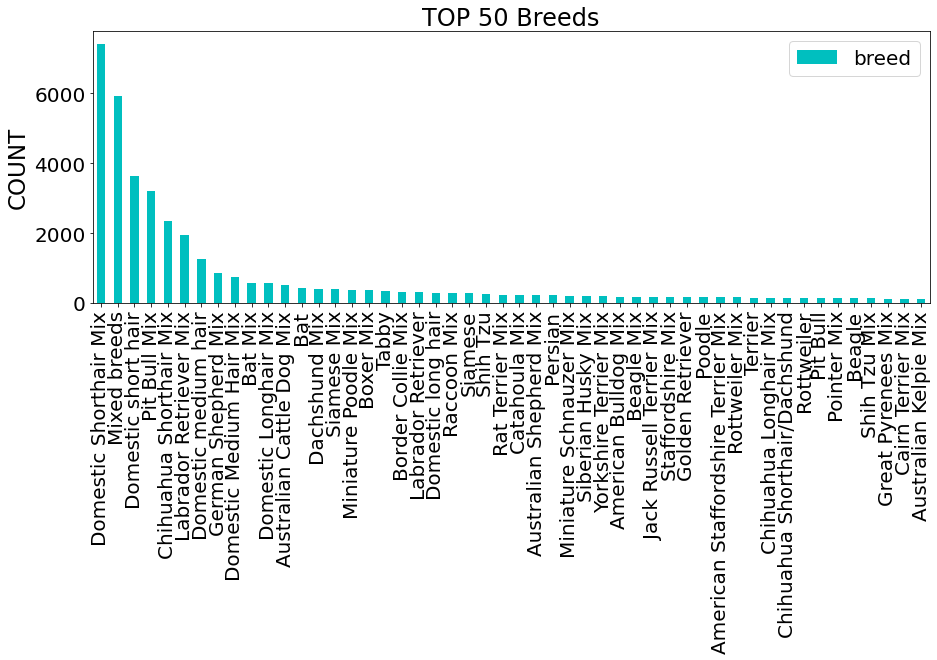

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.title('TOP 50 Breeds')
plt.ylabel('COUNT')
merge_train['breed'].value_counts()[:50].plot(kind='bar', color='c')
plt.legend()
plt.show()

In [ ]:
n = 50
mostCommonBreeds = merge_train['breed'].value_counts()[:n].index.tolist()
merge_train['breedIs'] = 'other'

for i in mostCommonBreeds:
  merge_train['breedIs'][merge_train['breed'] == i] = i

merge_train = merge_train.drop(['breed'], axis=1)

merge_train = merge_train.reset_index(drop=True)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
merge_train['breedIs']

0                       other
1                       other
2                       other
3                       other
4                       other
                 ...         
49478     Domestic short hair
49479    Domestic medium hair
49480    Domestic medium hair
49481     Domestic short hair
49482            Mixed breeds
Name: breedIs, Length: 49483, dtype: object

In [ ]:
mostCommonBreeds

['Domestic Shorthair Mix',
 'Mixed breeds',
 'Domestic short hair',
 'Pit Bull Mix',
 'Chihuahua Shorthair Mix',
 'Labrador Retriever Mix',
 'Domestic medium hair',
 'German Shepherd Mix',
 'Domestic Medium Hair Mix',
 'Bat Mix',
 'Domestic Longhair Mix',
 'Australian Cattle Dog Mix',
 'Bat',
 'Dachshund Mix',
 'Siamese Mix',
 'Miniature Poodle Mix',
 'Boxer Mix',
 'Tabby',
 'Border Collie Mix',
 'Labrador Retriever',
 'Domestic long hair',
 'Raccoon Mix',
 'Siamese',
 'Shih Tzu',
 'Rat Terrier Mix',
 'Catahoula Mix',
 'Australian Shepherd Mix',
 'Persian',
 'Miniature Schnauzer Mix',
 'Siberian Husky Mix',
 'Yorkshire Terrier Mix',
 'American Bulldog Mix',
 'Beagle Mix',
 'Jack Russell Terrier Mix',
 'Staffordshire Mix',
 'Golden Retriever',
 'Poodle',
 'American Staffordshire Terrier Mix',
 'Rottweiler Mix',
 'Terrier',
 'Chihuahua Longhair Mix',
 'Chihuahua Shorthair/Dachshund',
 'Rottweiler',
 'Pit Bull',
 'Pointer Mix',
 'Beagle',
 'Shih Tzu Mix',
 'Great Pyrenees Mix',
 'Cairn Te

In [ ]:
# merged_dataset = pd.concat([merge_train, merge_test],ignore_index=True)
# merged_dataset = merged_dataset.reset_index(drop=True)

In [ ]:
# merged_dataset

In [ ]:
merge_train

,outcometype,sex,AgeInMonths,AgeInDays,animaltype,color,Health,intake_type,intake_number,hasName,...,breedIs,Location,Speed,MaturitySize,FurLength,Vaccinated,Dewormed,Fee,AgeInYears,novaccine_dewormed
0,Return_to_Owner,None,12,2555,Dog,Yellow/White,Normal,Public Assist,2.0,1,...,other,Ausin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Return_to_Owner,None,3,2190,Dog,Yellow/White,Normal,Public Assist,3.0,1,...,other,Ausin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Transfer,None,4,3650,Dog,Tricolor,Normal,Owner Surrender,1.0,1,...,other,Ausin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Return_to_Owner,None,11,5840,Dog,Brown/White,Injured,Public Assist,1.0,1,...,other,Ausin,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Return_to_Owner,None,11,5475,Dog,Black/White,Aged,Stray,1.0,1,...,other,Ausin,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49478,Adoption,None,2,60,Cat,Black,Healthy,NaN,NaN,1,...,Domestic short hair,Malaysia,2,Medium,Medium,No,No,0.0,0.0,0.0
49479,Adoption,None,60,1800,Cat,Black/Yellow,Healthy,NaN,NaN,1,...,Domestic medium hair,Malaysia,4,Medium,Medium,Yes,Yes,0.0,5.0,0.0
49480,Adoption,None,2,60,Cat,Cream/Gray,Healthy,NaN,NaN,1,...,Domestic medium hair,Malaysia,3,Large,Medium,No,Yes,30.0,0.0,1.0
49481,Adoption,Female,9,270,Cat,Yellow/Whit,Healthy,NaN,NaN,1,...,Domestic short hair,Malaysia,4,Small,Short,Yes,Yes,0.0,0.0,0.0


### Smart

In [ ]:
def issmart(dataFrame):
  dataFrame['issmart']=pd.np.where(dataFrame.breedIs.str.contains('Siamese'), 1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Labrador Retriever'),1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Poodle'), 1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Golden Retriever'),1,
                       pd.np.where(dataFrame.breedIs.str.contains('Beagle'), 1,
                       pd.np.where(dataFrame.breedIs.str.contains('German Shephered Dog'),1,                                  
                       pd.np.where(dataFrame.breedIs.str.contains('Oriental Short Hair'),1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Bengal'), 1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Schnauzer'),1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Miniature Pinscher'),1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Jack Russell Terrier'), 1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Doberman Pinscher'),1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Cocker Spaniel'), 1, 
                       pd.np.where(dataFrame.breedIs.str.contains('Dalmatian'),1,
                       pd.np.where(dataFrame.breedIs.str.contains('Border Collie'),1,
                       pd.np.where(dataFrame.breedIs.str.contains('Australian Cattle'),1,0))))))))))))))))
  return dataFrame

In [ ]:
merget_train = issmart(merge_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Th

In [ ]:
merge_train.issmart.value_counts()

0    44281
1     5202
Name: issmart, dtype: int64

In [ ]:
def setSex(dataFrame):
    dataFrame['sex'] = pd.np.where(dataFrame.sex.str.contains("Female"), "Female",
                       pd.np.where(dataFrame.sex.str.contains("Male"), "Male", "None"))
    return dataFrame 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


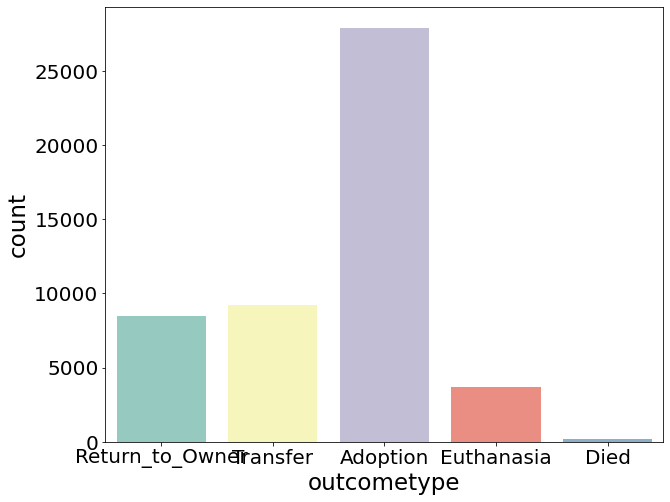

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(merge_train.outcometype, palette='Set3')

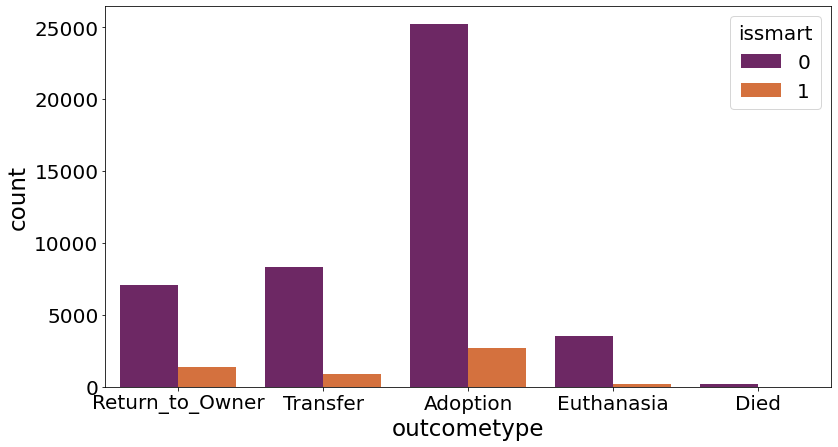

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(13, 7))
sns.countplot(data=merge_train, x='outcometype',hue='issmart', palette='inferno') # 

In [ ]:
merge_train.breedIs.value_counts

<bound method IndexOpsMixin.value_counts of 0                       other
1                       other
2                       other
3                       other
4                       other
                 ...         
49478     Domestic short hair
49479    Domestic medium hair
49480    Domestic medium hair
49481     Domestic short hair
49482            Mixed breeds
Name: breedIs, Length: 49483, dtype: object>

In [ ]:
merge_train = issmart(merge_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Th

In [ ]:
merge_train.issmart

0        0
1        0
2        0
3        0
4        0
        ..
49478    0
49479    0
49480    0
49481    0
49482    0
Name: issmart, Length: 49483, dtype: int64

In [ ]:
merge_train.breedIs

0                       other
1                       other
2                       other
3                       other
4                       other
                 ...         
49478     Domestic short hair
49479    Domestic medium hair
49480    Domestic medium hair
49481     Domestic short hair
49482            Mixed breeds
Name: breedIs, Length: 49483, dtype: object

In [ ]:
merge_train.issmart.value_counts()

0    44281
1     5202
Name: issmart, dtype: int64

In [ ]:
merge_train.outcometype

0        Return_to_Owner
1        Return_to_Owner
2               Transfer
3        Return_to_Owner
4        Return_to_Owner
              ...       
49478           Adoption
49479           Adoption
49480           Adoption
49481           Adoption
49482           Adoption
Name: outcometype, Length: 49483, dtype: object

In [ ]:
merge_train

,outcometype,sex,AgeInMonths,AgeInDays,animaltype,color,Health,intake_type,intake_number,hasName,...,Location,Speed,MaturitySize,FurLength,Vaccinated,Dewormed,Fee,AgeInYears,novaccine_dewormed,issmart
0,Return_to_Owner,None,12,2555,Dog,Yellow/White,Normal,Public Assist,2.0,1,...,Ausin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Return_to_Owner,None,3,2190,Dog,Yellow/White,Normal,Public Assist,3.0,1,...,Ausin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Transfer,None,4,3650,Dog,Tricolor,Normal,Owner Surrender,1.0,1,...,Ausin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Return_to_Owner,None,11,5840,Dog,Brown/White,Injured,Public Assist,1.0,1,...,Ausin,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Return_to_Owner,None,11,5475,Dog,Black/White,Aged,Stray,1.0,1,...,Ausin,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49478,Adoption,None,2,60,Cat,Black,Healthy,NaN,NaN,1,...,Malaysia,2,Medium,Medium,No,No,0.0,0.0,0.0,0
49479,Adoption,None,60,1800,Cat,Black/Yellow,Healthy,NaN,NaN,1,...,Malaysia,4,Medium,Medium,Yes,Yes,0.0,5.0,0.0,0
49480,Adoption,None,2,60,Cat,Cream/Gray,Healthy,NaN,NaN,1,...,Malaysia,3,Large,Medium,No,Yes,30.0,0.0,1.0,0
49481,Adoption,Female,9,270,Cat,Yellow/Whit,Healthy,NaN,NaN,1,...,Malaysia,4,Small,Short,Yes,Yes,0.0,0.0,0.0,0


In [ ]:
merge_train.columns

Index(['outcometype', 'sex', 'AgeInMonths', 'AgeInDays', 'animaltype', 'color',
       'Health', 'intake_type', 'intake_number', 'hasName', 'isPuppy',
       'Sterilized', 'isMultiColor', 'breedType', 'breedIs', 'Location',
       'Speed', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Fee',
       'AgeInYears', 'novaccine_dewormed', 'issmart'],
      dtype='object')

In [ ]:
merge_train.Health.value_counts()

Normal            30085
Healthy           14478
Injured            2170
Sick               1563
Minor Injury        481
Nursing             339
Aged                208
Other                66
Feral                38
Serious Injury       34
Pregnant             21
Name: Health, dtype: int64

In [ ]:
train_at.Health.value_counts()

Normal      30085
Injured      2170
Sick         1563
Nursing       339
Aged          208
Other          66
Feral          38
Pregnant       21
Name: Health, dtype: int64

In [ ]:
train_pf.Health.value_counts()

Healthy           14478
Minor Injury        481
Serious Injury       34
Name: Health, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


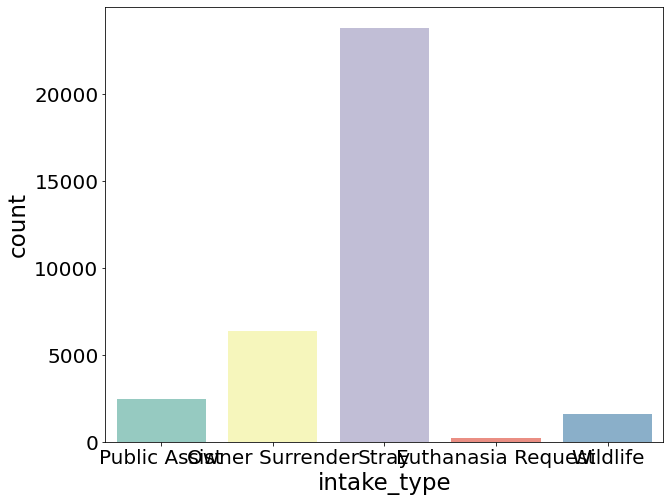

In [ ]:
train_at.intake_type.value_counts()


plt.figure(figsize=(10,8))
sns.countplot(merge_train.intake_type, palette='Set3')
plt.savefig("High intake.png",dpi=320)


In [ ]:
# address = 'drive/MyDrive/capston/'
# merge_train.to_csv(path_or_buf=address+'merged_dataset_renew')
# df.to_csv(path_or_buf=address+'test1.csv')

#EDA!!!!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


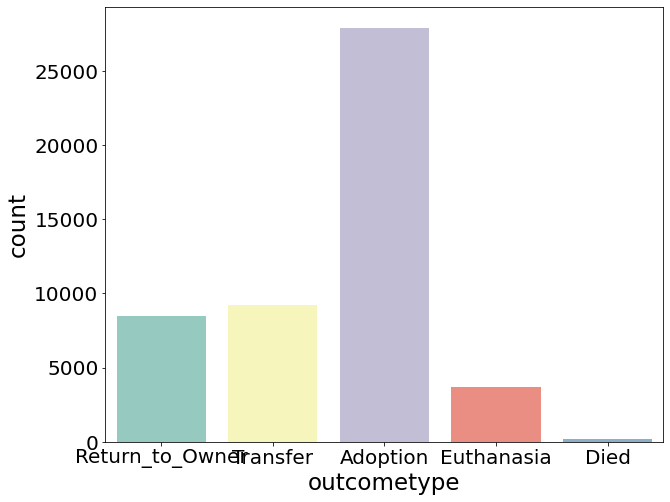

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(merge_train.outcometype, palette='Set3')

In [ ]:
plt.rc('font', size=5)        # 기본 폰트 크기
plt.rc('axes', labelsize=25)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=70) # figure title 폰트 크기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


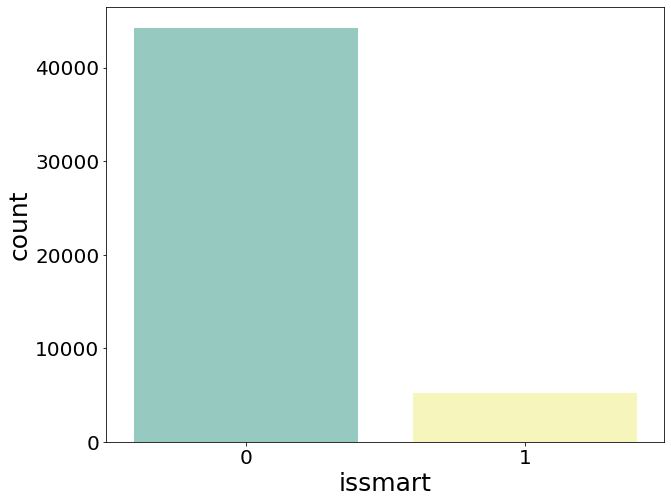

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(merge_train.issmart,palette='Set3')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


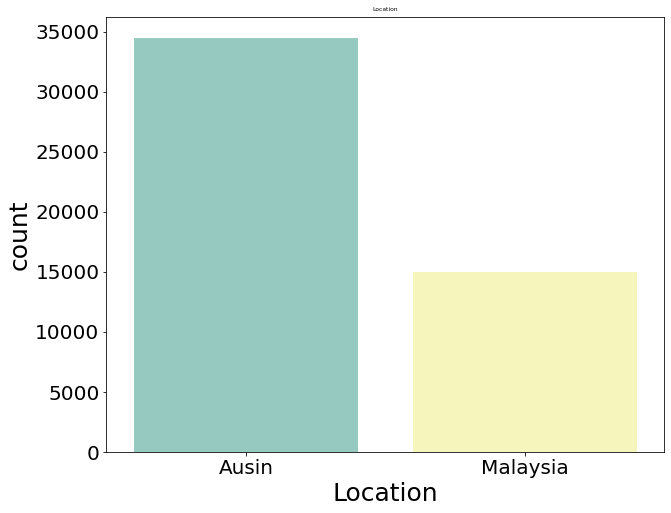

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Location')
sns.countplot(merge_train.Location,palette='Set3')
plt.savefig("High Location.png",dpi=320)




# MODELS

## Imports

In [ ]:
# !pip install --quiet optuna
!pip install pytorch-tabnet
# !pip install catboost
# !pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.metrics import Metric
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import f1_score, recall_score, roc_auc_score
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline, FeatureUnion
# from catboost import CatBoostRegressor
import lightgbm as lgb
# import optuna
# from optuna import Trial, visualization
from scikitplot.metrics import plot_roc

import warnings

warnings.filterwarnings(action='ignore')

import pandas as pd

# from catboost import CatBoostClassifier
import timeit


!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

pd.set_option('display.max_columns',100)

pd.set_option('display.max_rows',100)

pd.set_option('display.max_colwidth',500)

pd.set_option('display.html.use_mathjax',False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.1 MB/s 
     |████████████████████████████████| 133 kB 43.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=e58fbb3f45889218b09499c5a6d1e8551dbe35c9a39bd81d6c950e8408181d64
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
np.random.seed(0)

import os
from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [ ]:
%reload_ext autoreload

#### Custom function

In [ ]:
def make_random_split(dataset, test_size, train_size):

  # example :
  # a, b, c, d, e, f =  make_random_split(merge_train, test_size = 0.2, train_size = 0.8)

  data = dataset.drop('outcometype', axis=1)
  label = dataset['outcometype']
  # label = dataset.loc[:,['outcometype' in i for i in dataset.columns]]
  print(label)
  X_train, A_valid, y_train, B_valid = train_test_split(data, label, test_size = 0.2, random_state=13, shuffle=True, stratify=label)
  X_valid, X_test, y_valid, y_test = train_test_split(A_valid, B_valid, test_size = 0.5, random_state = 13, shuffle=True, stratify = B_valid)
  
  train_indices = X_train.index
  valid_indices = X_valid.index
  test_indices = X_test.index

  return X_train, y_train, train_indices, X_valid, y_valid, valid_indices, X_test, y_test, test_indices

In [ ]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("CMRmap"))

In [ ]:
def draw_roc_curve(models, model_names, X_test, y_test):
  # example
  # draw_roc_curve(models, model_names, X_test, y_test)
  plt.figure(figsize=(10,10))

  for model in range(len(models)):
    pred = models[model].predict_proba(X_test)
    fpt, trp, thresholds = plot_roc(y_test, pred, title = 'ROC', plot_micro=True, figsize=(11,8),cmap = cmap)
    plot_roc(fpt, trp, label=model_names[model])

  plt.plot([0,1],[0,1], '--k', label = 'random quess')
  plt.title('ROC')
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
def get_clf_eval(y_test, pred, pred_proba):
  acc = accuracy_score(y_test, pred)
  pre = precision_score(y_test, pred, average = 'weighted')
  re = recall_score(y_test, pred, average = 'weighted')
  f1 = f1_score(y_test, pred, average = 'weighted')
  auc = roc_auc_score(y_test, pred_proba, multi_class = 'ovr', average = 'weighted') 

  return round(acc,3), round(pre,3), round(re,3), round(f1,3), round(auc,3)

In [ ]:
# acc = accuracy_score(y_test, y_test)
# pre = precision_score(y_test, y_test, average = 'weighted')
# re = recall_score(y_test, y_test, average = 'weighted')
# f1 = f1_score(y_test, y_test, average = 'weighted')
# auc = roc_auc_score(y_test, pred_proba, multi_class = 'ovr', average = 'weighted') 

In [ ]:
# train_pf.columns

In [ ]:
# sns.countplot(train_pf.Dewormed, palette = 'Set3')

# # options(repr.plot.height=5)
# # a1 <- train %>%
# # ggplot(aes(x=AdoptionSpeed, y=Age, fill=Type)) +
# # geom_boxplot() +
# # theme(axis.text.x = element_text(angle = 45, hjust = 1))+
# # labs(x="", y="Age in Months", title="Age and Adoption")

In [ ]:
def print_clf_eval(y_test, pred, pred_proba):

   acc, pre, re, f1, auc = get_clf_eval(y_test, pred, pred_proba)

   print('정확도:{0:.4f}. 정밀도:{1:.4f}'.format(acc,pre))
   print('재현율:{0:.4f}. F1:{1:.4f}, AUC:{2:,.4f}'.format(re,f1, auc))


In [ ]:
def get_result(model, X_train, y_train, X_valid, y_valid, X_test, y_test):

  if model == tab_super_clf:
        print('Tabnet supervised learning start')
       
        model.fit(
            X_train=X_train, y_train=y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            eval_name=['train', 'valid'],
            eval_metric=['logloss','f1_weighted'],
            max_epochs=300 , patience=20,
            batch_size=1024, virtual_batch_size=256,
            num_workers=0,
            weights=1,
            drop_last=True,
        ) 
        print('Tabnet supervised learning Done')

  elif model == tab_unsuper_clf:
        unsupervised_model.fit(
            X_train = X_train,
            eval_set=[X_valid],
            pretraining_ratio = 0.8,
            drop_last=True,
        )
        print('Tabnet Unsupervised learning start')
       
        unsupervised_model.save_model('./test_pretrain')
        loaded_pretrain = TabNetPretrainer()
        loaded_pretrain.load_model('./test_pretrain.zip')

        model.fit(
            X_train=X_train, y_train=y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            eval_name=['train', 'valid'],
            eval_metric=['logloss','f1_weighted'],
            max_epochs=300, patience=20,
            batch_size=1024, virtual_batch_size=256,
            num_workers=0,
            weights=1,
            drop_last=True,
            from_unsupervised=loaded_pretrain
        ) 

        print('Tabnet Unsupervised learning start')

  elif model == rf_clf:
        print('Random Forest learning start')

        model.fit(X_train, y_train)
  #      print('hi')

        print('Random Forest learning Done')

  elif model == xgb_clf:
        print('XGBoost learning start')
        
        model.fit(
            X_train,
            y_train,
            eval_metric='mlogloss',
            eval_set=[(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds=50
        )
        print('XGBoost learning Done')



  elif model == lgb_clf:
        print('LightGBM learning start')

        model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="multiclass", 
                 eval_set=[(X_test, y_test)], verbose=True)
        print('LightGBM learning Done')

  else:
       print('Not proper model!!')
    
  pred_proba = model.predict_proba(X_test) #accuracy는 F1이나 auc 그래프 그릴 떄는 predict_proba 사용한다.
  pred = model.predict(X_test) 

  return get_clf_eval(y_test, pred, pred_proba)

In [ ]:
def get_result_pd(models, model_names, X_train, y_train, X_valid, y_valid, X_test, y_tset):
  col_names = ['accuracy','precision','recall','f1','roc_auc']
  tmp = []

  for model in models:
    tmp.append(get_result(model, X_train, y_train, X_valid, y_valid,X_test, y_tset))

  return pd.DataFrame(tmp, columns = col_names, index = model_names)

In [ ]:
# if "Set" not in merge_train.columns:
#     merge_train["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(merge_train.shape[0],))

##Merged train,valid,test set


In [ ]:
train_indices = merge_train.index

In [ ]:
nunique = merge_train.nunique()
types = merge_train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in merge_train.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, merge_train[col].nunique())
        l_enc = LabelEncoder()
        merge_train[col].fillna(merge_train[col].mode()[0], inplace = True)
        merge_train[col] = l_enc.fit_transform(merge_train[col].values)

        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)

    else:
        merge_train.fillna(merge_train.loc[train_indices, col].mean(), inplace=True)

outcometype 5
sex 3
AgeInMonths 106
AgeInDays 137
animaltype 4
color 417
Health 11
intake_type 5
intake_number 13
hasName 2
isPuppy 2
Sterilized 2
isMultiColor 2
breedType 2
breedIs 51
Location 2
Speed 5
MaturitySize 4
FurLength 3
Vaccinated 3
Dewormed 3
Fee 74
AgeInYears 19
novaccine_dewormed 2
issmart 2


In [ ]:
merge_train.dtypes

outcometype           int64
sex                   int64
AgeInMonths           int64
AgeInDays             int64
animaltype            int64
color                 int64
Health                int64
intake_type           int64
intake_number         int64
hasName               int64
isPuppy               int64
Sterilized            int64
isMultiColor          int64
breedType             int64
breedIs               int64
Location              int64
Speed                 int64
MaturitySize          int64
FurLength             int64
Vaccinated            int64
Dewormed              int64
Fee                   int64
AgeInYears            int64
novaccine_dewormed    int64
issmart               int64
dtype: object

In [ ]:
print(merge_train.AgeInDays.head(20))
print(merge_train.isPuppy.head(20))


0      96
1      85
2     113
3     128
4     127
5     127
6     127
7     127
8     131
9     128
10    125
11    128
12    125
13    129
14    123
15    132
16    123
17    127
18    128
19    120
Name: AgeInDays, dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: isPuppy, dtype: int64


In [ ]:
 X_train, y_train, train_indices, X_valid, y_valid, valid_indices, X_test, y_test, test_indices = make_random_split(merge_train, test_size = 0.2, train_size = 0.8)

0        3
1        3
2        4
3        3
4        3
        ..
49478    0
49479    0
49480    0
49481    0
49482    0
Name: outcometype, Length: 49483, dtype: int64


In [ ]:
# y_train.shape

In [ ]:
# X_train.shape

In [ ]:
# train_indices

In [ ]:
# X_valid.shape

In [ ]:
# valid_indices.shape

In [ ]:
# X_test.shape

In [ ]:
# test_indices.shape

In [ ]:
features = [ col for col in X_train.columns]
print(len(features),features)

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
print(len(cat_idxs),cat_idxs)

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
print(len(cat_dims),cat_dims)

24 ['sex', 'AgeInMonths', 'AgeInDays', 'animaltype', 'color', 'Health', 'intake_type', 'intake_number', 'hasName', 'isPuppy', 'Sterilized', 'isMultiColor', 'breedType', 'breedIs', 'Location', 'Speed', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Fee', 'AgeInYears', 'novaccine_dewormed', 'issmart']
24 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
24 [3, 106, 137, 4, 417, 11, 5, 13, 2, 2, 2, 2, 2, 51, 2, 5, 4, 3, 3, 3, 74, 19, 2, 2]


In [ ]:
target = 'outcometype'
features = [ col for col in X_train.columns if col not in [target]]
print(len(features),features)

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
print(len(cat_idxs),cat_idxs)

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
print(len(cat_dims),cat_dims)

24 ['sex', 'AgeInMonths', 'AgeInDays', 'animaltype', 'color', 'Health', 'intake_type', 'intake_number', 'hasName', 'isPuppy', 'Sterilized', 'isMultiColor', 'breedType', 'breedIs', 'Location', 'Speed', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Fee', 'AgeInYears', 'novaccine_dewormed', 'issmart']
24 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
24 [3, 106, 137, 4, 417, 11, 5, 13, 2, 2, 2, 2, 2, 51, 2, 5, 4, 3, 3, 3, 74, 19, 2, 2]


In [ ]:
# from tqdm.notebook import tqdm

# nunique = cats.nunique()
# types = cats.dtypes

# categorical_columns = []
# categorical_dims =  {}
# for col in tqdm(cats.columns):
#     if types[col] == 'object' or nunique[col] < 200:
#         print(col, cats[col].nunique())
#         l_enc = LabelEncoder()
#         cats[col] = cats[col].fillna("NaN")
#         cats[col] = l_enc.fit_transform(cats[col].values)
#         try:
#             cats[col] = cats[col].fillna("NaN")
#             cats[col] = l_enc.transform(cats[col].values)
#         except:
#             print(f"Column {col} does not exist in test set")
#         categorical_columns.append(col)
#         categorical_dims[col] = len(l_enc.classes_)
#     else:
#         training_mean = cats.loc[cats, col].mean()
#         train.fillna(training_mean, inplace=True)
#         test.fillna(training_mean, inplace=True)

In [ ]:
X_train = merge_train[features].values[train_indices]
y_train = merge_train['outcometype'].values[train_indices]

X_valid = merge_train[features].values[valid_indices]
y_valid = merge_train['outcometype'].values[valid_indices]

X_test = merge_train[features].values[test_indices]
y_test = merge_train['outcometype'].values[test_indices]

In [ ]:
# test = test.drop(['breed'], axis=1)
# test_cats = test.loc[test['animaltype'] == 'Cat']
# cat_ids = test_cats['id']

# test_cats = test_cats.drop('id', axis = 1)
# test_cats = pd.get_dummies(test_cats)

# test = test.drop('id', axis = 1)
# test = pd.get_dummies(test)

In [ ]:
# from tqdm.notebook import tqdm

# nunique = cats.nunique()
# types = cats.dtypes

# categorical_columns = []
# categorical_dims =  {}
# for col in tqdm(cats.columns):
#     if types[col] == 'object' or nunique[col] < 200:
#         print(col, cats[col].nunique())
#         l_enc = LabelEncoder()
#         cats[col] = cats[col].fillna("NaN")
#         cats[col] = l_enc.fit_transform(cats[col].values)
#         try:
#             cats[col] = cats[col].fillna("NaN")
#             cats[col] = l_enc.transform(cats[col].values)
#         except:
#             print(f"Column {col} does not exist in test set")
#         categorical_columns.append(col)
#         categorical_dims[col] = len(l_enc.classes_)
#     else:
#         training_mean = cats.loc[cats, col].mean()
#         train.fillna(training_mean, inplace=True)
#         test.fillna(training_mean, inplace=True)

##Austin animal dataset train,valid,test set


#전처리시 여기 이전까지 돌리기

In [ ]:
# train_indices = train_at.index

In [ ]:
# nunique = train_at.nunique()
# types = train_at.dtypes

# categorical_columns = []
# categorical_dims =  {}
# for col in train_at.columns:
#     if types[col] == 'object' or nunique[col] < 200:
#         print(col, train_at[col].nunique())
#         l_enc = LabelEncoder()
#         train_at[col].fillna(train_at[col].mode()[0], inplace = True)
#         train_at[col] = l_enc.fit_transform(train_at[col].values)
#         #     train_at[column].fillna(train_at[column].mode()[0], inplace=True)

#         categorical_columns.append(col)
#         categorical_dims[col] = len(l_enc.classes_)
#         # train_at[col] = l_enc.inverse_transform(train_at[col].values)

#     else:
#         train_at.fillna(train_at.loc[train_indices, col].mean(), inplace=True)

In [ ]:
#  X_train, y_train, train_indices, X_valid, y_valid, valid_indices, X_test, y_test, test_indices = make_random_split(train_at, test_size = 0.2, train_size = 0.8)

In [ ]:
# features = [ col for col in X_train.columns]
# print(len(features),features)

# cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
# print(len(cat_idxs),cat_idxs)

# cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
# print(len(cat_dims),cat_dims)

In [ ]:
# X_train = train_at[features].values[train_indices]
# y_train = train_at['outcometype'].values[train_indices]

# X_valid = train_at[features].values[valid_indices]
# y_valid = train_at['outcometype'].values[valid_indices]

# X_test = train_at[features].values[test_indices]
# y_test = train_at['outcometype'].values[test_indices]

In [ ]:
# test = test.drop(['breed'], axis=1)
# test_cats = test.loc[test['animaltype'] == 'Cat']
# cat_ids = test_cats['id']

# test_cats = test_cats.drop('id', axis = 1)
# test_cats = pd.get_dummies(test_cats)

# test = test.drop('id', axis = 1)
# test = pd.get_dummies(test)

In [ ]:
# from tqdm.notebook import tqdm

# nunique = cats.nunique()
# types = cats.dtypes

# categorical_columns = []
# categorical_dims =  {}
# for col in tqdm(cats.columns):
#     if types[col] == 'object' or nunique[col] < 200:
#         print(col, cats[col].nunique())
#         l_enc = LabelEncoder()
#         cats[col] = cats[col].fillna("NaN")
#         cats[col] = l_enc.fit_transform(cats[col].values)
#         try:
#             cats[col] = cats[col].fillna("NaN")
#             cats[col] = l_enc.transform(cats[col].values)
#         except:
#             print(f"Column {col} does not exist in test set")
#         categorical_columns.append(col)
#         categorical_dims[col] = len(l_enc.classes_)
#     else:
#         training_mean = cats.loc[cats, col].mean()
#         train.fillna(training_mean, inplace=True)
#         test.fillna(training_mean, inplace=True)

##petfinder animal dataset train,valid,test set


In [ ]:
# train_indices = train_pf.index

In [ ]:
#  X_train, y_train, train_indices, X_valid, y_valid, valid_indices, X_test, y_test, test_indices = make_random_split(train_pf, test_size = 0.2, train_size = 0.8)

In [ ]:
# nunique = train_pf.nunique()
# types = train_pf.dtypes

# categorical_columns = []
# categorical_dims =  {}
# for col in train_pf.columns:
#     if types[col] == 'object' or nunique[col] < 200:
#         print(col, train_pf[col].nunique())
#         l_enc = LabelEncoder()
#         train_pf[col].fillna(train_pf[col].mode()[0], inplace = True)
#         train_pf[col] = l_enc.fit_transform(train_pf[col].values)
#         #     train_pf[column].fillna(train_pf[column].mode()[0], inplace=True)

#         categorical_columns.append(col)
#         categorical_dims[col] = len(l_enc.classes_)
#         # train_pf[col] = l_enc.inverse_transform(train_pf[col].values)

#     else:
#         train_pf.fillna(train_pf.loc[train_indices, col].mean(), inplace=True)

In [ ]:
train_pf.dtypes

animaltype            object
breed                 object
MaturitySize          object
FurLength             object
Vaccinated            object
Dewormed              object
Sterilized             int64
Health                object
Fee                    int64
Speed                  int64
outcometype           object
sex                   object
hasName                int64
AgeInDays              int64
AgeInMonths            int64
AgeInYears             int64
isPuppy                int64
novaccine_dewormed     int64
color                 object
isMultiColor           int64
breedType             object
Location              object
dtype: object

In [ ]:
# train_pf = train_pf.drop(['Breed2'],axis=1)

In [ ]:
# features = [ col for col in X_train.columns]
# print(len(features),features)

# cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
# print(len(cat_idxs),cat_idxs)

# cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
# print(len(cat_dims),cat_dims)

In [ ]:
# X_train = train_pf[features].values[train_indices]
# y_train = train_pf['AdoptionSpeed'].values[train_indices]

# X_valid = train_pf[features].values[valid_indices]
# y_valid = train_pf['AdoptionSpeed'].values[valid_indices]

# X_test = train_pf[features].values[test_indices]
# y_test = train_pf['AdoptionSpeed'].values[test_indices]

In [ ]:
# test = test.drop(['breed'], axis=1)
# test_cats = test.loc[test['animaltype'] == 'Cat']
# cat_ids = test_cats['id']

# test_cats = test_cats.drop('id', axis = 1)
# test_cats = pd.get_dummies(test_cats)

# test = test.drop('id', axis = 1)
# test = pd.get_dummies(test)

In [ ]:
# from tqdm.notebook import tqdm

# nunique = cats.nunique()
# types = cats.dtypes

# categorical_columns = []
# categorical_dims =  {}
# for col in tqdm(cats.columns):
#     if types[col] == 'object' or nunique[col] < 200:
#         print(col, cats[col].nunique())
#         l_enc = LabelEncoder()
#         cats[col] = cats[col].fillna("NaN")
#         cats[col] = l_enc.fit_transform(cats[col].values)
#         try:
#             cats[col] = cats[col].fillna("NaN")
#             cats[col] = l_enc.transform(cats[col].values)
#         except:
#             print(f"Column {col} does not exist in test set")
#         categorical_columns.append(col)
#         categorical_dims[col] = len(l_enc.classes_)
#     else:
#         training_mean = cats.loc[cats, col].mean()
#         train.fillna(training_mean, inplace=True)
#         test.fillna(training_mean, inplace=True)

##Training

In [ ]:
# from pytorch_tabnet.metrics import Metric

# class F1Weighted(Metric):
#     def __init__(self):
#         self._name = "f1_weighted"
#         self._maximize = True

#     def __call__(self, y_true, y_pred):
#         return f1_score(y_true,  np.argmax(y_pred, axis = 1), average = 'weighted')

###Tabnet Supervised learning

####Dog&Cat

In [ ]:
# tab_super_clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
#                        cat_idxs=cat_idxs,
#                        cat_dims=cat_dims,                       
#                        optimizer_params=dict(lr=2e-2),
#                        scheduler_params={"step_size":10, # how to use learning rate scheduler
#                                          "gamma":0.9},
#                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
#                        mask_type='sparsemax' # This will be overwritten if using pretrain model
#                       )

In [ ]:
# tab_super_clf.fit(
#     X_train=X_train, y_train=y_train,
#     eval_set=[(X_train, y_train), (X_valid, y_valid)],
#     eval_name=['train', 'valid'],
#     eval_metric=['logloss','f1_weighted'],
#     max_epochs=1000 , patience=20,
#     batch_size=1024, virtual_batch_size=256,
#     num_workers=0,
#     weights=1,
#     drop_last=True,
# )

In [ ]:
# plt.title('Supervised_tabnet')
# plt.plot(tab_super_clf.history['loss'],'r', label = 'loss')
# plt.plot(tab_super_clf.history['train_logloss'],'g', label = 'train logloss')
# plt.plot(tab_super_clf.history['valid_logloss'],'b', label = 'validation logloss')

# plt.legend()
# plt.show()

In [ ]:
# pred = tab_super_clf.predict(X_test)
# pred_proba = tab_super_clf.predict_proba(X_test)
# print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

In [ ]:
# from matplotlib.colors import ListedColormap
# cmap = ListedColormap(sns.color_palette("CMRmap"))

# skplt.metrics.plot_roc(y_test, tab_super_clf.predict_proba(X_test), title='Supervised Tabnet Classifier', plot_micro=True, plot_macro=True, 
#                        title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

#### Tabnet_Explain Mask

In [ ]:
# explain_matrix, masks = tab_super_clf.explain(X_test)
# fig, axs = plt.subplots(1, 3, figsize=(20,20))

# for i in range(3):
#     axs[i].imshow(masks[i][:50])
#     axs[i].set_title(f"mask {i}")

In [ ]:
# preds = tab_super_clf.predict_proba(X_test)

# print('Tabnet_AUROC_score : ', round(roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr'),3) )
# print('Tabent_accuracy_score : ',round(accuracy_score(y_true=y_test,y_pred=clf.predict(X_test)),3))

In [ ]:
# from matplotlib.colors import ListedColormap
# cmap = ListedColormap(sns.color_palette("CMRmap"))

# skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), title='Tabnet Classifier', plot_micro=True, plot_macro=True, 
#                        title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

In [ ]:
# y_pred = clf.predict(X_test)
# print('tabnet_f1 score weighted',round(f1_score(y_test, y_pred, average='weighted'),3)) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음


#### TabNet_Feature Importance

In [ ]:
# feat_importances = tab_super_clf.feature_importances_
# indices = np.argsort(feat_importances)

# plt.figure()
# plt.title("Feature importances")
# plt.barh(range(len(feat_importances)), feat_importances[indices],
#        color="r", align="center")
# # If you want to define your own labels,
# # change indices to a list of labels on the following line.
# plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
# plt.ylim([-1, len(feat_importances)])
# plt.show()

In [ ]:
# saving_path_name = "./content/drive/MyDrive/capston/single/supervised_tabnet_model"
# saved_filepath = tab_super_clf.save_model(saving_path_name)

# # loaded_clf = TabNetClassifier()
# # loaded_clf.load_model(saved_filepath)

###Tabnet self_supervised learning


####Dog&Cat

In [ ]:
tab_unsuper_clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

Device used : cuda


In [ ]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', # "sparsemax",
)


unsupervised_model.fit(
    X_train = X_train,
    eval_set=[X_valid],
    pretraining_ratio = 0.8,
    drop_last=True,
)

Device used : cuda
epoch 0  | loss: 5.99595 | val_0_unsup_loss: 1.00312 |  0:00:07s
epoch 1  | loss: 1.00333 | val_0_unsup_loss: 0.98278 |  0:00:14s
epoch 2  | loss: 0.97109 | val_0_unsup_loss: 0.90001 |  0:00:20s
epoch 3  | loss: 0.90279 | val_0_unsup_loss: 0.8308  |  0:00:26s
epoch 4  | loss: 0.84862 | val_0_unsup_loss: 0.79828 |  0:00:32s
epoch 5  | loss: 0.81256 | val_0_unsup_loss: 0.76965 |  0:00:39s
epoch 6  | loss: 0.78948 | val_0_unsup_loss: 0.73319 |  0:00:43s
epoch 7  | loss: 0.76672 | val_0_unsup_loss: 0.70166 |  0:00:46s
epoch 8  | loss: 0.74119 | val_0_unsup_loss: 0.66597 |  0:00:50s
epoch 9  | loss: 0.72184 | val_0_unsup_loss: 0.6408  |  0:00:54s
epoch 10 | loss: 0.70214 | val_0_unsup_loss: 0.61305 |  0:00:58s
epoch 11 | loss: 0.6869  | val_0_unsup_loss: 0.6033  |  0:01:01s
epoch 12 | loss: 0.67411 | val_0_unsup_loss: 0.58931 |  0:01:05s
epoch 13 | loss: 0.66112 | val_0_unsup_loss: 0.57416 |  0:01:09s
epoch 14 | loss: 0.64991 | val_0_unsup_loss: 0.55365 |  0:01:12s
epoch 

In [ ]:
# unsupervised_model

In [ ]:
# reconstructed_X, embedded_X = unsupervised_model.predict(X_valid)
# assert(reconstructed_X.shape==embedded_X.shape)

In [ ]:
# unsupervised_explain_matrix, unsupervised_masks = unsupervised_model.explain(X_valid)


In [ ]:
# fig, axs = plt.subplots(1, 3, figsize=(20,20))

# for i in range(3):
#     axs[i].imshow(unsupervised_masks[i][:50])
#     axs[i].set_title(f"mask {i}")

### Tabnet 결과

In [ ]:
from pytorch_tabnet.metrics import Metric

class F1Weighted(Metric):
    def __init__(self):
        self._name = "f1_weighted"
        self._maximize = True

    def __call__(self, y_true, y_pred):
        return f1_score(y_true,  np.argmax(y_pred, axis = 1), average = 'weighted')

In [ ]:
unsupervised_model.save_model('./content/drive/MyDrive/capston/split/test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./content/drive/MyDrive/capston/split/test_pretrain.zip')

Successfully saved model at ./content/drive/MyDrive/capston/split/test_pretrain.zip
Device used : cuda
Device used : cuda


In [ ]:
# unsupervised_model.save_model('./test_pretrain')
# loaded_pretrain = TabNetPretrainer()
# loaded_pretrain.load_model('./test_pretrain.zip')

In [ ]:
tab_unsuper_clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1_weighted'],
    max_epochs=1000, patience=20,
    batch_size=1024, virtual_batch_size=256,
    num_workers=0,
    weights=1,
    drop_last=True,
    from_unsupervised=loaded_pretrain
    
)

Loading weights from unsupervised pretraining
epoch 0  | loss: 1.19755 | train_logloss: 1.04649 | train_f1_weighted: 0.58955 | valid_logloss: 1.02928 | valid_f1_weighted: 0.59312 |  0:00:03s
epoch 1  | loss: 0.98181 | train_logloss: 1.02642 | train_f1_weighted: 0.6478  | valid_logloss: 1.02254 | valid_f1_weighted: 0.65118 |  0:00:08s
epoch 2  | loss: 0.87324 | train_logloss: 1.00845 | train_f1_weighted: 0.68076 | valid_logloss: 1.00003 | valid_f1_weighted: 0.6869  |  0:00:11s
epoch 3  | loss: 0.81691 | train_logloss: 0.71214 | train_f1_weighted: 0.75434 | valid_logloss: 0.73395 | valid_f1_weighted: 0.74654 |  0:00:15s
epoch 4  | loss: 0.77616 | train_logloss: 0.72518 | train_f1_weighted: 0.73779 | valid_logloss: 0.73732 | valid_f1_weighted: 0.73497 |  0:00:18s
epoch 5  | loss: 0.73979 | train_logloss: 0.69188 | train_f1_weighted: 0.76596 | valid_logloss: 0.70783 | valid_f1_weighted: 0.76112 |  0:00:21s
epoch 6  | loss: 0.71119 | train_logloss: 0.66855 | train_f1_weighted: 0.76348 | val

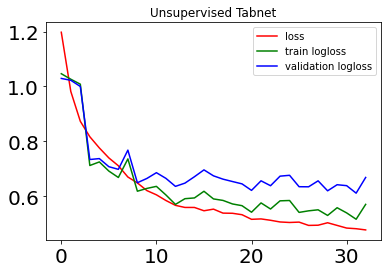

In [ ]:
plt.title('Unsupervised Tabnet')
plt.plot(tab_unsuper_clf.history['loss'],'r', label = 'loss')
plt.plot(tab_unsuper_clf.history['train_logloss'],'g', label = 'train logloss')
plt.plot(tab_unsuper_clf.history['valid_logloss'],'b', label = 'validation logloss')

plt.legend()
plt.show()

In [ ]:
pred = tab_unsuper_clf.predict(X_test)
pred_proba = tab_unsuper_clf.predict_proba(X_test)
print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

정확도:0.7540. 정밀도:0.7800
재현율:0.7540. F1:0.7650, AUC:0.9310


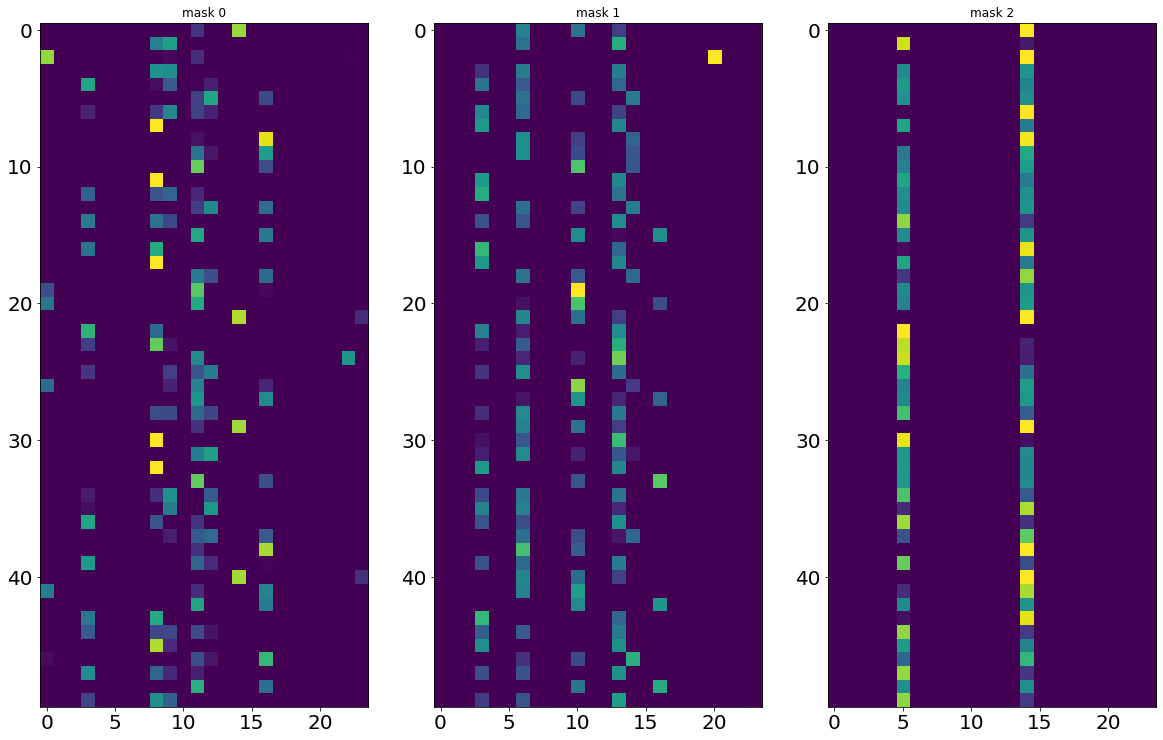

In [ ]:
explain_matrix, masks = tab_unsuper_clf.explain(X_test)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

#### TabNet_Feature Importance

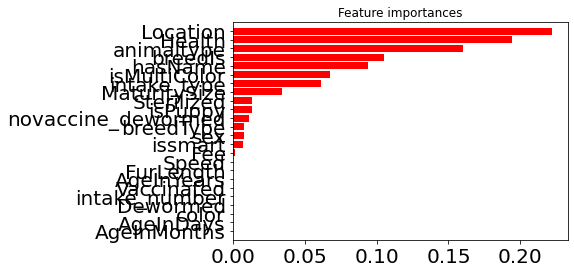

In [ ]:
feat_importances = tab_unsuper_clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

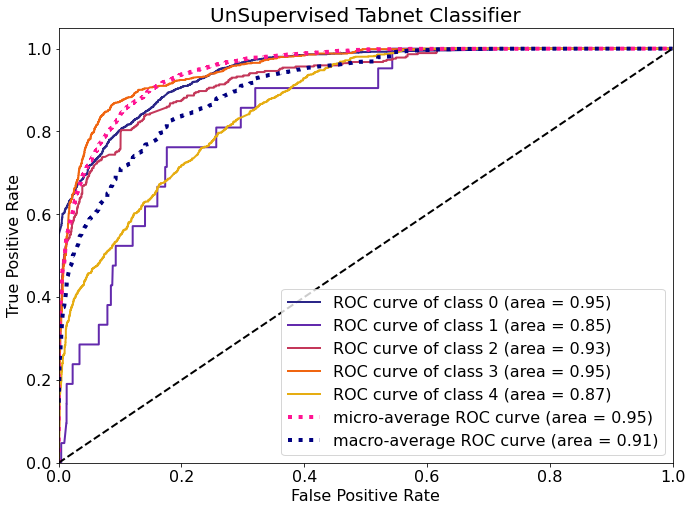

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, tab_unsuper_clf.predict_proba(X_test), title='UnSupervised Tabnet Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

#### Tabnet_Explain Mask

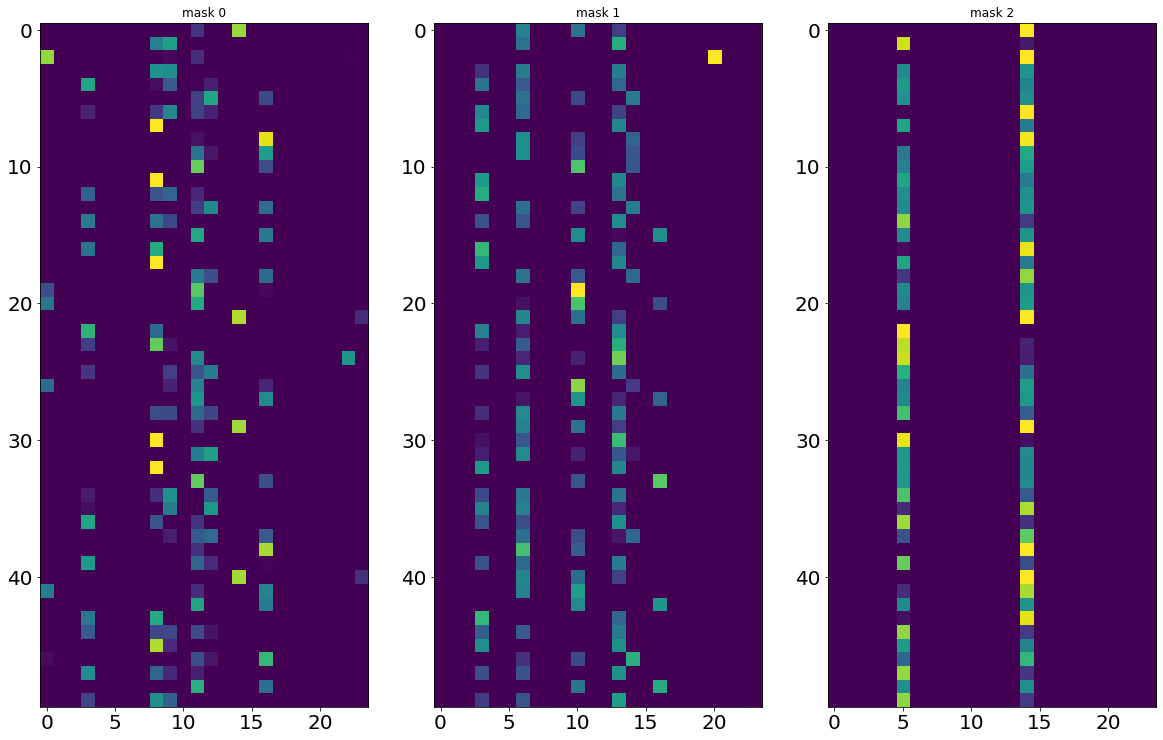

In [ ]:
explain_matrix, masks = tab_unsuper_clf.explain(X_test)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

### Save/load tabnet model

In [ ]:
saving_path_name = "./content/drive/MyDrive/capston/split/unsupervised_tabnet_model"
saved_filepath = tab_unsuper_clf.save_model(saving_path_name)

# loaded_clf = TabNetClassifier()
# loaded_clf.load_model(saved_filepath)

Successfully saved model at ./content/drive/MyDrive/capston/split/unsupervised_tabnet_model.zip


In [ ]:
# from matplotlib.colors import ListedColormap
# cmap = ListedColormap(sns.color_palette("CMRmap"))

# skplt.metrics.plot_roc(y_test, loaded_clf.predict_proba(X_test), title='load Tabnet Classifier', plot_micro=True, plot_macro=True, 
#                        title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

In [ ]:
# pred = complete_model.predict(X_test)
# pred_proba = complete_model.predict_proba(X_test)
# print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

In [ ]:
# from matplotlib.colors import ListedColormap
# cmap = ListedColormap(sns.color_palette("CMRmap"))

# skplt.metrics.plot_roc(y_test, complete_model.predict_proba(X_test), title='Load_unSupervised Tabnet Classifier', plot_micro=True, plot_macro=True, 
#                        title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

#### TabNet_Feature Importance

#### tabnet roc score


In [ ]:
# preds = clf.predict_proba(X_test)
# roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovo') 

NameError: ignored

In [ ]:
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr')#불균형한 데이터에 적합한 one vs rest 

#### tabnet roc graph


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [ ]:
dataset_name = 'Cat+Dog'

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )

preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### tabnet F1 score

In [ ]:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, y_pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, y_pred, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

####Dog

f1_score(y_test, y_pred, average='macro') # 불균형을 고려하지 않음

In [ ]:
from sklearn.model_selection import KFold
import optuna
from optuna import Trial, visualization


In [ ]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

In [ ]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=dogs_cat_idxs,
    cat_dims=dogs_cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', # "sparsemax",
)

unsupervised_model.fit(
    X_train = X_train_dogs,
    eval_set=[X_valid_dogs],
    pretraining_ratio = 0.8,
    drop_last=True,
)

In [ ]:
def Objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 56, 64, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X_train):
        # X_train1, X_valid1 = X_train[train_index], X_train[test_index]
        # y_train1, y_valid1 = X_train[train_index], X_train[test_index]
        classifier = TabNetClassifier(**tabnet_params)
        classifier.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_train, y_train), (X_valid, y_valid)],
                  patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 1000),
                  eval_metric=['logloss','f1_weighted'],
                  from_unsupervised=loaded_pretrain,
                  )
        CV_score_array.append(classifier.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [ ]:
study = optuna.create_study(direction="minimize", study_name='TabNet optimization')
study.optimize(Objective, timeout=15,n_trials=5) 

In [ ]:
TabNet_params = study.best_params

In [ ]:
final_params = dict(n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     from_unsupervised=loaded_pretrain,
                     )
epochs = TabNet_params['epochs']

In [ ]:
clf = TabNetClassifier(final_params)
clf.fit(X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        eval_metric=['logloss','f1_weighted'],
        max_epochs=epochs ,
        batch_size=512, virtual_batch_size=128,
        patience=TabNet_params['patience'], 
        num_workers=0,
        weights=1,
        drop_last=True,
        from_unsupervised=loaded_pretrain        
        )

#### TabNet_Feature Importance

In [ ]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Tabnet_Explain Mask

In [ ]:
explain_matrix, masks = clf.explain(X_test)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

#### tabnet loss graph

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_f1_weighted'],'g')
plt.plot(clf.history['valid_f1_weighted'],'b')

#### tabnet roc score


In [ ]:
preds = clf.predict_proba(X_test)
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr') 

In [ ]:
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr')#불균형한 데이터에 적합한 one vs rest

#### tabnet roc graph


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [ ]:
dataset_name = 'Cat+Dog'

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### tabnet F1 score

In [ ]:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, y_pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, y_pred, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

In [ ]:
models = [tab_super_clf] # For test
model_names = ['Tabnet', 'Tabnet Unsupervised', 'Random Forest', 'XGboost', 'LightGbm']



#태브넷, 랜덤포레스트, XGboost, LGBM 순서

result = get_result_pd(models, model_names, X_train, y_train,  X_valid, y_valid, X_test, y_test)
result

In [ ]:
models = [tab_unsuper_clf] # For test
model_names = ['Tabnet Unsuper clf']



#태브넷, 랜덤포레스트, XGboost, LGBM 순서

result = get_result_pd(models, model_names, X_train, y_train,  X_valid, y_valid, X_test, y_test)
result

In [ ]:
models = [tab_unsuper_clf, rf_clf, xgb_clf, lgb_clf]
model_names = ['Tabnet Unsupervised', 'Random Forest', 'XGboost', 'LightGbm']



#태브넷, 랜덤포레스트, XGboost, LGBM 순서

results = get_result_pd(models, model_names, X_train, y_train,  X_valid, y_valid, X_test, y_test)
results

#### Tabnet 결과

In [ ]:
reconstructed_X, embedded_X = unsupervised_model.predict(X_valid)
assert(reconstructed_X.shape==embedded_X.shape)

In [ ]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model.explain(X_valid)


In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [ ]:
from pytorch_tabnet.metrics import Metric

class F1Weighted(Metric):
    def __init__(self):
        self._name = "f1_weighted"
        self._maximize = True

    def __call__(self, y_true, y_pred):
        return f1_score(y_true,  np.argmax(y_pred, axis = 1), average = 'weighted')

In [ ]:
plt.plot(tab_super_clf.history['loss'],'r')
plt.plot(tab_super_clf.history['train_logloss'],'g')
plt.plot(tab_super_clf.history['valid_logloss'],'b')

In [ ]:
unsupervised_model.save_model('./test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain.zip')

In [ ]:
tab_unsuper_clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1_weighted'],
    max_epochs=300, patience=20,
    batch_size=1024, virtual_batch_size=256,
    num_workers=0,
    weights=1,
    drop_last=True,
    from_unsupervised=loaded_pretrain
    
) 

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, tab_super_clf.predict_proba(X_test), title='Supervised Tabnet Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

In [ ]:
pred = tab_super_clf.predict(X_test)
pred_proba = tab_super_clf.predict_proba(X_test)
print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

In [ ]:
X_valid.shape

In [ ]:
y_train.shape

#### TabNet_Feature Importance

In [ ]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Tabnet_Explain Mask

In [ ]:
explain_matrix, masks = clf.explain(X_test)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

#### tabnet roc score


In [ ]:
preds = clf.predict_proba(X_test)
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovo') 

In [ ]:
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr')#불균형한 데이터에 적합한 one vs rest 

#### tabnet roc graph


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [ ]:
dataset_name = 'Cat+Dog'

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )

preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### tabnet F1 score

In [ ]:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, y_pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, y_pred, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

####Dog

f1_score(y_test, y_pred, average='macro') # 불균형을 고려하지 않음

In [ ]:
from sklearn.model_selection import KFold
import optuna
from optuna import Trial, visualization


In [ ]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

In [ ]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=dogs_cat_idxs,
    cat_dims=dogs_cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', # "sparsemax",
)

unsupervised_model.fit(
    X_train = X_train_dogs,
    eval_set=[X_valid_dogs],
    pretraining_ratio = 0.8,
    drop_last=True,
)

In [ ]:
def Objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 56, 64, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X_train):
        # X_train1, X_valid1 = X_train[train_index], X_train[test_index]
        # y_train1, y_valid1 = X_train[train_index], X_train[test_index]
        classifier = TabNetClassifier(**tabnet_params)
        classifier.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_train, y_train), (X_valid, y_valid)],
                  patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 1000),
                  eval_metric=['logloss','f1_weighted'],
                  from_unsupervised=loaded_pretrain,
                  )
        CV_score_array.append(classifier.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [ ]:
study = optuna.create_study(direction="minimize", study_name='TabNet optimization')
study.optimize(Objective, timeout=15,n_trials=5) 

In [ ]:
TabNet_params = study.best_params

In [ ]:
final_params = dict(n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     from_unsupervised=loaded_pretrain,
                     )
epochs = TabNet_params['epochs']

In [ ]:
clf = TabNetClassifier(final_params)
clf.fit(X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        eval_metric=['logloss','f1_weighted'],
        max_epochs=epochs ,
        batch_size=512, virtual_batch_size=128,
        patience=TabNet_params['patience'], 
        num_workers=0,
        weights=1,
        drop_last=True,
        from_unsupervised=loaded_pretrain        
        )

#### TabNet_Feature Importance

In [ ]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Tabnet_Explain Mask

In [ ]:
explain_matrix, masks = clf.explain(X_test)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

#### tabnet loss graph

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_f1_weighted'],'g')
plt.plot(clf.history['valid_f1_weighted'],'b')

#### tabnet roc score


In [ ]:
preds = clf.predict_proba(X_test)
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr') 

In [ ]:
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr')#불균형한 데이터에 적합한 one vs rest

#### tabnet roc graph


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [ ]:
dataset_name = 'Cat+Dog'

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### tabnet F1 score

In [ ]:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, y_pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, y_pred, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

### tabnet Tuning

###Tabnet dog self_supervised learning


####Dog

In [ ]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

In [ ]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=dogs_cat_idxs,
    cat_dims=dogs_cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', # "sparsemax",
)


unsupervised_model.fit(
    X_train = X_train_dogs,
    eval_set=[X_valid_dogs],
    pretraining_ratio = 0.8,
    drop_last=True,
)

In [ ]:
reconstructed_X, embedded_X = unsupervised_model.predict(X_valid_dogs)
assert(reconstructed_X.shape==embedded_X.shape)

In [ ]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model.explain(X_valid_dogs)


In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"pre trained mask {i}")

In [ ]:
unsupervised_model.save_model('./test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain.zip')

In [ ]:
from pytorch_tabnet.metrics import Metric

class F1Weighted(Metric):
    def __init__(self):
        self._name = "f1_weighted"
        self._maximize = True

    def __call__(self, y_true, y_pred):
        return f1_score(y_true,  np.argmax(y_pred, axis = 1), average = 'weighted')

In [ ]:
max_epochs = 1000
clf.fit(
    X_train=X_train_dogs, y_train=y_train_dogs,
    eval_set=[(X_train_dogs, y_train_dogs), (X_valid_dogs, y_valid_dogs)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1_weighted'],
    max_epochs=max_epochs , patience=20,
    batch_size=512, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain    
) 

#### TabNet_Feature Importance

In [ ]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Tabnet_Explain Mask

In [ ]:
explain_matrix, masks = clf.explain(X_test_dogs)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"selp supervised mask {i}")

#### tabnet loss graph

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_f1_weighted'],'g')
plt.plot(clf.history['valid_f1_weighted'],'b')

#### tabnet roc score


#### tabnet roc graph


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test_dogs, clf.predict_proba(X_test_dogs), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [ ]:
dataset_name = 'Dog'

preds = clf.predict_proba(X_test_dogs)
test_auc = round(roc_auc_score(y_score=preds, y_true=y_test_dogs,multi_class='ovr',average='weighted' ),3)
preds_valid = clf.predict_proba(X_valid_dogs)
valid_auc = round(roc_auc_score(y_score=preds_valid, y_true=y_valid_dogs,multi_class='ovr',average='weighted'),3)

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### tabnet F1 score

In [ ]:
y_pred = clf.predict(X_test_dogs)
print(round(f1_score(y_test_dogs, y_pred, average='weighted'),3)) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(round(f1_score(y_test_dogs, y_pred, average='micro'),3)) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(round(f1_score(y_test_dogs, y_pred, average='macro'),3)) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음



### Dog's tabnet Tuning


In [ ]:
from sklearn.model_selection import KFold
import optuna
from optuna import Trial, visualization

In [ ]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=dogs_cat_idxs,
    cat_dims=dogs_cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', # "sparsemax",
)


unsupervised_model.fit(
    X_train = X_train_dogs,
    eval_set=[X_valid_dogs],
    pretraining_ratio = 0.8,
    drop_last=True,
)

In [ ]:
unsupervised_model.save_model('./test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain.zip')/

In [ ]:
def Objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 56, 64, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X_train_dogs):
        # X_train1, X_valid1 = X_train[train_index], X_train[test_index]
        # y_train1, y_valid1 = X_train[train_index], X_train[test_index]
        classifier = TabNetClassifier(**tabnet_params)
        classifier.fit(X_train=X_train_dogs, y_train=y_train_dogs,
                  eval_set=[(X_train_dogs, y_train_dogs), (X_valid_dogs, y_valid_dogs)],
                  patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 1000),
                  eval_metric=['logloss','f1_weighted'],
                  from_unsupervised=loaded_pretrain,
                  )
        CV_score_array.append(classifier.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [ ]:
study = optuna.create_study(direction="minimize", study_name='TabNet optimization')
study.optimize(Objective, timeout=15,n_trials=5) 

In [ ]:
TabNet_params = study.best_params

In [ ]:
final_params = dict(n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     from_unsupervised=loaded_pretrain,
                     )
epochs = TabNet_params['epochs']

In [ ]:
clf = TabNetClassifier(final_params)
clf.fit(X_train=X_train_dogs, y_train=y_train_dogs,
        eval_set=[(X_train_dogs, y_train_dogs), (X_valid_dogs, y_valid_dogs)],
        eval_name=['train', 'valid'],
        eval_metric=['logloss','f1_weighted'],
        max_epochs=1000 ,
        batch_size=512, virtual_batch_size=128,
        patience=TabNet_params['patience'], 
        num_workers=0,
        weights=1,
        drop_last=True,
        from_unsupervised=loaded_pretrain        
        )

#### TabNet_Feature Importance

In [ ]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Tabnet_Explain Mask

In [ ]:
explain_matrix, masks = clf.explain(X_test_dogs)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

#### tabnet loss graph

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_f1_weighted'],'g')
plt.plot(clf.history['valid_f1_weighted'],'b')

#### tabnet roc score


In [ ]:
preds = clf.predict_proba(X_test_dogs)
roc_auc_score(y_score=preds, y_true=y_test_dogs,multi_class='ovr') 

In [ ]:
roc_auc_score(y_score=preds, y_true=y_test_dogs,multi_class='ovr')#불균형한 데이터에 적합한 one vs rest

#### tabnet roc graph


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test_dogs, clf.predict_proba(X_test_dogs), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [ ]:
dataset_name = 'Dog'

preds = clf.predict_proba(X_test_dogs)
test_auc = round(roc_auc_score(y_score=preds, y_true=y_test_dogs,multi_class='ovr',average='weighted' ),3)
preds_valid = clf.predict_proba(X_valid_dogs)
valid_auc = round(roc_auc_score(y_score=preds_valid, y_true=y_valid_dogs,multi_class='ovr',average='weighted'),3)

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### tabnet F1 score

In [ ]:
y_pred = clf.predict(X_test_dogs)
print(round(f1_score(y_test_dogs, y_pred, average='weighted'),3)) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(round(f1_score(y_test_dogs, y_pred, average='micro'),3)) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(round(f1_score(y_test_dogs, y_pred, average='macro'),3)) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

### LogisticRegression classifier 

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred_winner = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

#### LogisticRegression classifier f1 score

In [ ]:
print(f1_score(y_test, Y_pred_winner, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, Y_pred_winner, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, Y_pred_winner, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train, y_train.ravel())  

Y_pred_KNN = knn.predict(X_test)


acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

##### KNN classifier f1 score

In [ ]:
print(f1_score(y_test, Y_pred_KNN, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, Y_pred_KNN, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, Y_pred_KNN, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, clf.predict(X_test)))

#### Decison tree classifier f1 score

In [ ]:
print(f1_score(y_test, pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려)
print(f1_score(y_test, pred, average='macro')) # 불균형을 고려하지 않음


```

0.6391194805271514
0.7101796407185629
0.3104011420874966
```



### Random Forest(Tuning Done)


In [ ]:
rf_clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=1000,
                             min_samples_split=20,
                             min_samples_leaf=1,
                             max_depth = 10,
                             max_features='auto',
                             oob_score=True,
                             random_state=0,
                             n_jobs=-1)

rf_clf.fit(X_train, y_train)
# rf = rf.predict_proba(X_test)
# rf_pred = rf.predict(X_test)

# rf.score(X_train, y_train)
# acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
# acc_random_forest

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train.ravel())
rf_pred = rf_clf.predict(X_test)

rf_clf.score(X_train, y_train.ravel())
acc_random_forest = round(rf_clf.score(X_train, y_train) * 100, 2)
acc_random_forest

In [ ]:
train_at.counts

In [ ]:
pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)
print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

In [ ]:
;

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 5000,
 'random_state': 0}

####Random Forest Feature Importance

In [ ]:
feat_importances = rf_clf.feature_importances_
indices = np.argsort(feat_importances)
plt.figure(figsize=(10,20))
plt.title('Random Forest Feature Importances Cat&Dog')
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

####Random Forest AuROC score

In [ ]:
dataset_name = 'Cat+Dog'

preds = rf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )


preds_valid = rf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### Random Forest f1 score

In [ ]:
print(f1_score(y_test, rf_pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, rf_pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, rf_pred, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

# XGboost 여기부터 모델 학습

### XGBoost

ROC Curve

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

Without Grid Search and Parameters (Base)

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=1000)
xgb_clf.fit(
    X_train,
    y_train,
    eval_metric='mlogloss',
    eval_set=[(X_train,y_train),(X_test,y_test)],
    early_stopping_rounds=20
    )

[0]	validation_0-mlogloss:1.4776	validation_1-mlogloss:1.47642
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 20 rounds.


XGBClassifier(n_estimators=1, objective='multi:softprob')

In [ ]:
pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)
print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

정확도:0.8240. 정밀도:0.8180
재현율:0.8240. F1:0.8160, AUC:0.9510


#### 모델 예측과정

In [ ]:
results = xgb_clf.evals_result()
x_axis = range(0, 1)

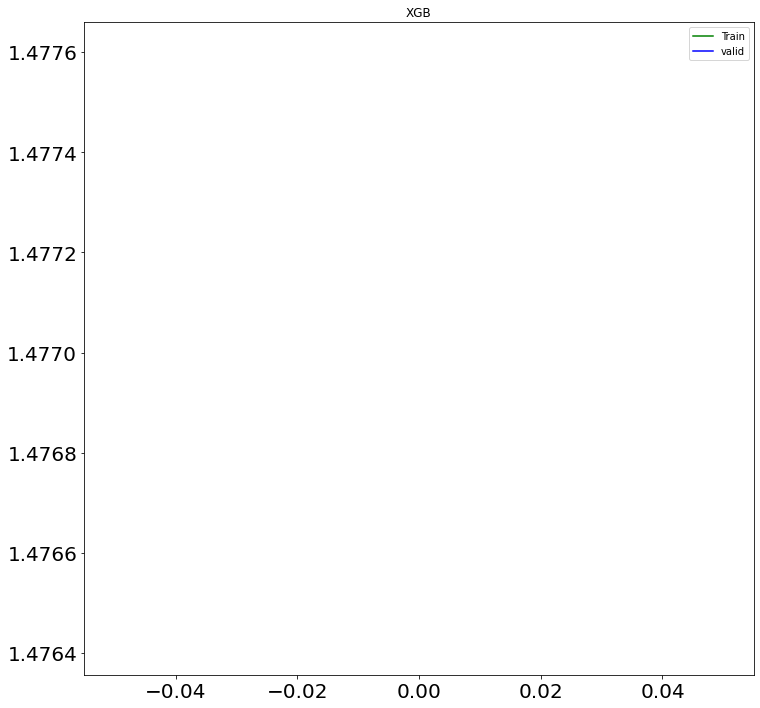

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
plt.title('XGB')
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train', color = 'green')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='valid', color = 'blue')
ax.legend()

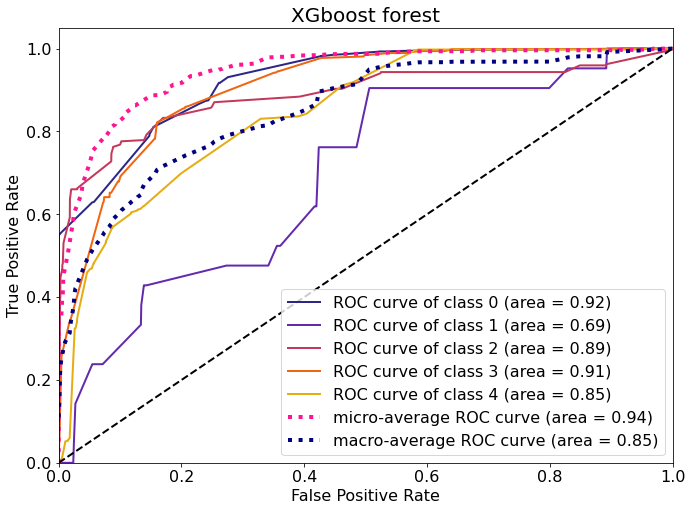

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, xgb_clf.predict_proba(X_test), title='XGboost forest', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

plt.savefig("AUAC resoltion.png",dpi=320)


#### permutation importance

In [ ]:
perm = PermutationImportance(xgb_clf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

ValueError: ignored

In [ ]:
# pd.Series(perm.feature_importances_, features).sort_values(ascending=False)

Grid Search(진행중)


In [ ]:
alg = xgb.XGBClassifier(objective='multi:softprob')
params = param_grid = {
    'n_estimators': [500, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [5,10,15],
    'subsample': [0.7, 0.8, 0.9],
    'learning_rate': [0.01, 0.02]
}
clf = GridSearchCV(alg, params, 
                        verbose=1,
                        scoring='neg_log_loss') #만약 NaN문제 발생시 error_score='raise' 추가

clf.fit(X_train,y_train)
pred = clf.predict_proba(X_test)
print(clf.best_score_)
print(clf.best_params_)


Best params : max_depth=5, n_estimators=1000, learning_rate=0.01,subsample=0.8, colsample_bytree=0.7

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=5, missing=np.nan, n_estimators=1000, learning_rate=0.01,  subsample=0.8, colsample_bytree=0.7, seed=1024,objective= 'multi:softprob')
    
# xgb_clf.fit(
#     X_train,
#     y_train,
#     eval_metric='mlogloss',
#     eval_set=[(X_train,y_train),(X_test, y_test)],
#     early_stopping_rounds=50
#     )

# score = xgb_clf.score(X_train, y_train)
# print(score)

In [ ]:
# z =np.matrix( X_test[1]) #모든 피쳐가 존재할 때, 예측 가능
# y = xgb_clf.predict(z)
# y

In [ ]:
# # save to JSON
# xgb_clf.save_model("/content/drive/MyDrive/capston/model.json")
# # save to text format
# xgb_clf.save_model("/content/drive/MyDrive/capston/model.txt")

xgb_loaded = xgb.XGBClassifier()

xgb_loaded.load_model("/content/drive/MyDrive/capston/model.json")


In [ ]:
z = LabelEncoder().fit(y_test)

xgb_loaded._le = z
pred_proba = xgb_loaded.predict_proba(X_test)
pred = xgb_loaded.predict(X_test)

print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

# clf._le = LabelEncoder().fit(y_test)
# y_pred_proba = clf.predict_proba(X_test)
# y_pred = clf.predict(X_test)

In [ ]:
z =np.matrix( X_test[1]) #모든 피쳐가 존재할 때, 예측 가능
y = xgb_loaded.predict(z)
y

####XGBoost Feature Importance

In [ ]:
feat_importances = xgb_clf.feature_importances_
indices = np.argsort(feat_importances)
plt.figure(figsize=(10,20))
plt.title('XGBoost Feature Importances Cat&Dog')
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

In [ ]:
dataset_name = 'Cat+Dog'

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr' )


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### XGBoost auc graph

In [ ]:
xgb_pred_with_grid = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, xgb_clf.predict_proba(X_test), title='XGB Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

####XGBoost AuROC score

In [ ]:
dataset_name = 'Cat+Dog'

preds = model.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )


preds_valid = model.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### XGBoost_F1 score

In [ ]:
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted')) 
print(f1_score(y_test, y_pred, average='micro')) 
print(f1_score(y_test, y_pred, average='macro')) 

### Catboost

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
cat_clf = CatBoostClassifier(
  iterations=1000,
  learning_rate=0.03,
  eval_metric='MultiClass'
)

cat_clf.fit(
    X_train, y_train,
    eval_set=[(X_train,y_train),(X_test,y_test)],    
    verbose=False,
    plot=True
);   


In [ ]:
output.disable_custom_widget_manager()

In [ ]:
pred = cat_clf.predict(X_test)
pred_proba = cat_clf.predict_proba(X_test)
print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

In [ ]:
# pred = cat_clf.predict(X_test)
# pred_proba = cat_clf.predict_proba(X_test)
# print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

정확도:0.8250. 정밀도:0.8180
재현율:0.8250. F1:0.8170, AUC:0.9510

In [ ]:
pred_with_grid = cat_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, cat_clf.predict_proba(X_test), title='Catboost Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# merge에서 가져와서 라벨인코딩 되어 있는 X_test
perm = PermutationImportance(cat_clf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

# Catboost hyperparameter tuning

In [ ]:
# alg = CatBoostClassifier(objective='multi:softprob')
# params = param_grid = {
#     'n_estimators': [500, 700, 1000],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [5,10,15],
#     'subsample': [0.7, 0.8, 0.9],
#     'learning_rate': [0.01, 0.02]
# }
# tuned_cat_clf = GridSearchCV(alg, params, 
#                         verbose=1,
#                         scoring='neg_log_loss') #만약 NaN문제 발생시 error_score='raise' 추가

# tuned_cat_clf.fit(X_train,y_train)
# pred = tuned_cat_clf.predict_proba(X_test)
# print(clf.best_score_)
# print(clf.best_params_)


### LightGBM

In [ ]:
# param = [{'n_estimators': [100, 500, 1000],
#          'learning_rate': [0.1, 0.05, 0.01]}]
# model = GridSearchCV(LGBMClassifier(), param, cv=5)
# name = 'LightGBM'
# model.fit(X_train, y_train)
# print(name,': ',model.best_params_)
# pred_y_cats = model.predict_proba(X_test)

# print('train score: {}'.format(model.score(X_train, y_train)))
# print('test score: {}'.format(model.score(X_test, y_test)))

In [ ]:

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 

# preds = lgb_clf.predict(X_test)
# pred_proba = lgb_clf.predict_proba(X_test)[:, 1]

In [ ]:
lgb_clf = LGBMClassifier(n_estimators=1000,learning_rate = 0.005)
evals = [(X_test, y_test)]
lgb_clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="multiclass", 
                 eval_set=evals, verbose=True)

In [ ]:
results = lgb_clf.evals_result()
x_axis = range(0, 1000)

fig, ax = plt.subplots(figsize=(12,12))
plt.title('LGB')
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train', color = 'green')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='valid', color = 'blue')
ax.legend()

test

In [ ]:
# pred = lgb_clf.predict(X_test)
# pred_proba = lgb_clf.predict_proba(X_test)
# print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

In [ ]:
# pred = lgb_clf.predict(X_test)
# pred_proba = lgb_clf.predict_proba(X_test)
# print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

정확도:0.7730. 정밀도:0.7570
재현율:0.7730. F1:0.7560, AUC:0.9280

In [ ]:
pred = lgb_clf.predict(X_test)
pred_proba = lgb_clf.predict_proba(X_test)
print_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

In [ ]:
# from matplotlib.colors import ListedColormap
# cmap = ListedColormap(sns.color_palette("CMRmap"))

# skplt.metrics.plot_roc(y_test, lgb_clf.predict_proba(X_test), title='LGBM', plot_micro=True, plot_macro=True, 
#                        title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, lgb_clf.predict_proba(X_test), title='LGBM', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

LightGBM :  {'learning_rate': 0.05, 'n_estimators': 100}
train score: 0.7801690546130328
test score: 0.7707983696955166

In [ ]:
# from sklearn.externals import joblibfrom lightgbm 
# import LGBMClassifier 

# save modeljoblib.dump(model, './content/drive/MyDrive/capston/lgb.pkl')
# load modelload_model = joblib.load('./content/drive/MyDrive/capston/lgb.pkl')


####LGBM Feature Importance

In [ ]:
feat_importances = lgb_clf.feature_importances_
indices = np.argsort(feat_importances)
plt.figure(figsize=(10,20))
plt.title('LGBM Feature Importances Cat&Dog')
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Model 강화학습 중요도 판단 

In [ ]:
!pip install shap

In [ ]:
import shap


Class 0

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0], X_test) #클래스 0에 대한 분석, 빨간색을 띌수록 타겟에 대해 양의 영향력이 존재한다고 함. 그럼 여기서 feature7, Feature2는 높을수록 타겟에 양의 영향력이 존재, feature15는 음의 영향력 존재. 그렇다면 여기서 feature를 읽으려면 어떻게 해야 하는가?..
# fig = shap.summary_plot(shap_values, X_test)
# plt.savefig(f'{PATH}/shap.png', dpi=300, bbox_inches="tight")

Class 1

In [ ]:
shap.initjs()
explainer = shap.Explainer(lgb_clf)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap_values

In [ ]:
# shap.initjs() # javascript 초기화 (graph 초기화)
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[0])

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[1,n], X_test.iloc[1,:]) 


#### LGBM auc graph

In [ ]:
skplt.metrics.plot_roc(y_test, lgb_clf.predict_proba(X_test), title='LightGBM Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

####LGBM AuROC score

In [ ]:
# dataset_name = 'Cat+Dog'

# preds = lgbm_wrapper.predict_proba(X_test)
# test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted')


# preds_valid = lgbm_wrapper.predict_proba(X_valid)
# valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

# print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
# print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### LGBM f1 score

In [ ]:
# y_pred = model.predict(X_test)

# print(f1_score(y_test, y_pred, average='weighted')) 
# print(f1_score(y_test, y_pred, average='micro')) 
# print(f1_score(y_test, y_pred, average='macro')) 

In [ ]:
# gbm_gc.best_params_

In [ ]:
# gridsearch_stats(gbm_gc, X_test, y_test)

In [ ]:
# probas = gbm_gc.predict_proba(X_test)

RandomForestClassifier

In [ ]:
# from sklearn.model_selection import GridSearchCV, cross_val_score

# print(cross_val_score(RandomForestClassifier(n_estimators=500, 
#                                  n_jobs=-1, random_state=0, max_features= 15, 
#                             max_depth= 5), 
#                               X_train, y_train, cv=5))
# print('')
# print('mean of cv-scores: {0}'.format(round(np.mean(cross_val_score(RandomForestClassifier(n_estimators=1000, 
#                                  n_jobs=-1, random_state=1, max_features=60, 
#                             max_depth= 5), 
#                               X_train, y_train, cv=5)),4)))

#### Multiple Model dataframe




In [ ]:
title = 'mode_merge_train'
merge_train.to_csv(path_or_buf='/content/drive/MyDrive/'+title)

In [ ]:
models = [tab_super_clf] # For test
model_names = ['Tabnet', 'Tabnet Unsupervised', 'Random Forest', 'XGboost', 'LightGbm']



#태브넷, 랜덤포레스트, XGboost, LGBM 순서

result = get_result_pd(models, model_names, X_train, y_train,  X_valid, y_valid, X_test, y_test)
result

In [ ]:
models = [tab_unsuper_clf] # For test
model_names = ['Tabnet Unsuper clf']



#태브넷, 랜덤포레스트, XGboost, LGBM 순서

result = get_result_pd(models, model_names, X_train, y_train,  X_valid, y_valid, X_test, y_test)
result

In [ ]:
models = [tab_unsuper_clf, rf_clf, xgb_clf, lgb_clf]
model_names = ['Tabnet Unsupervised', 'Random Forest', 'XGboost', 'LightGbm']



#태브넷, 랜덤포레스트, XGboost, LGBM 순서

results = get_result_pd(models, model_names, X_train, y_train,  X_valid, y_valid, X_test, y_test)
results

In [ ]:
!pip install sweetviz

In [ ]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(merge_train)

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

In [ ]:
feature_config

In [ ]:
X_test

In [ ]:
y_test